In [1]:
print('good afternoon')

good afternoon


# Set up 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
!pip install statsmodels

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose


!pip install matplotlib
!pip install ydata_profiling
from ydata_profiling import ProfileReport
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datetime import datetime, timedelta
from datetime import date

def extract_first_date_of_week(date):
    
    # Find the Monday of the week
    monday = date - timedelta(days=date.weekday())

    return monday.strftime('%Y-%m-%d')

def extract_first_date_of_month(date):
    # Replace the day part of the date with 1 to get the first day of the month
    first_date_of_month = pd.to_datetime(date).replace(day=1)
    return first_date_of_month

def convert_index(df):
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['season'] = df.month%12 // 3 + 1
    
def create_features(df,col):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df[col].dt.hour
    df['dayofweek'] = df[col].dt.dayofweek
    df['quarter'] = df[col].dt.quarter
    df['month'] = df[col].dt.month
    df['year'] = df[col].dt.year
    df['dayofyear'] = df[col].dt.dayofyear
    df['dayofmonth'] = df[col].dt.day
    df['weekofyear'] = df[col].dt.isocalendar().week
    return df

  Obtaining dependency information for visions[type_image_path]==0.7.5 from https://files.pythonhosted.org/packages/62/fa/6a8539c83d2ccbd08d5f0c843b1784af9ff514e77f4c9d5d6800fdd340f6/visions-0.7.5-py3-none-any.whl.metadata
  Using cached visions-0.7.5-py3-none-any.whl.metadata (6.3 kB)
Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [68]:
df = pd.read_csv('Year 2010-2011.csv',encoding='unicode_escape')
df

Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

            InvoiceDate  Price  Customer ID         Country  
0        12/1/2010 8:26   2.55      17850.0  United Kingdom  
1        12/1/2010 8:26   3.39      17850.0  United Kingdom  
2        12/1/2010 8:26   2.75      17850.0  United Kingdom  
3        12/1/2010 8:26   3.39      17850.0  United Kingdom  
4        12/1/2010 8:26   3.39      17850.0  United Kingdom  
...                 ...    ...          ...             ...  
541905  12/9/2011 12:50   2.10      12680.0          France  
541906  12/9/2011 12:50   4.15      12680.0          France  
541907  12/9/2011 12:50   4.15      12680.0          France  
541908  12/9/2011 12:50   4.95      12680.0          France  
541909  12/9/2011 12:50  18.00      12680.0          France  

[541910 rows x 8 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [70]:
df.columns = df.columns.str.lower()

# preprocessing

In [81]:
# preprocessing
df['datetime'] = pd.to_datetime(df['invoicedate'])
df['date'] = df['datetime'].dt.date
df['stockcode'] = df['stockcode'].astype(str)
df['customer id'] = df['customer id'].astype(str)
df['sales'] = df['quantity']*df['price']

In [29]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

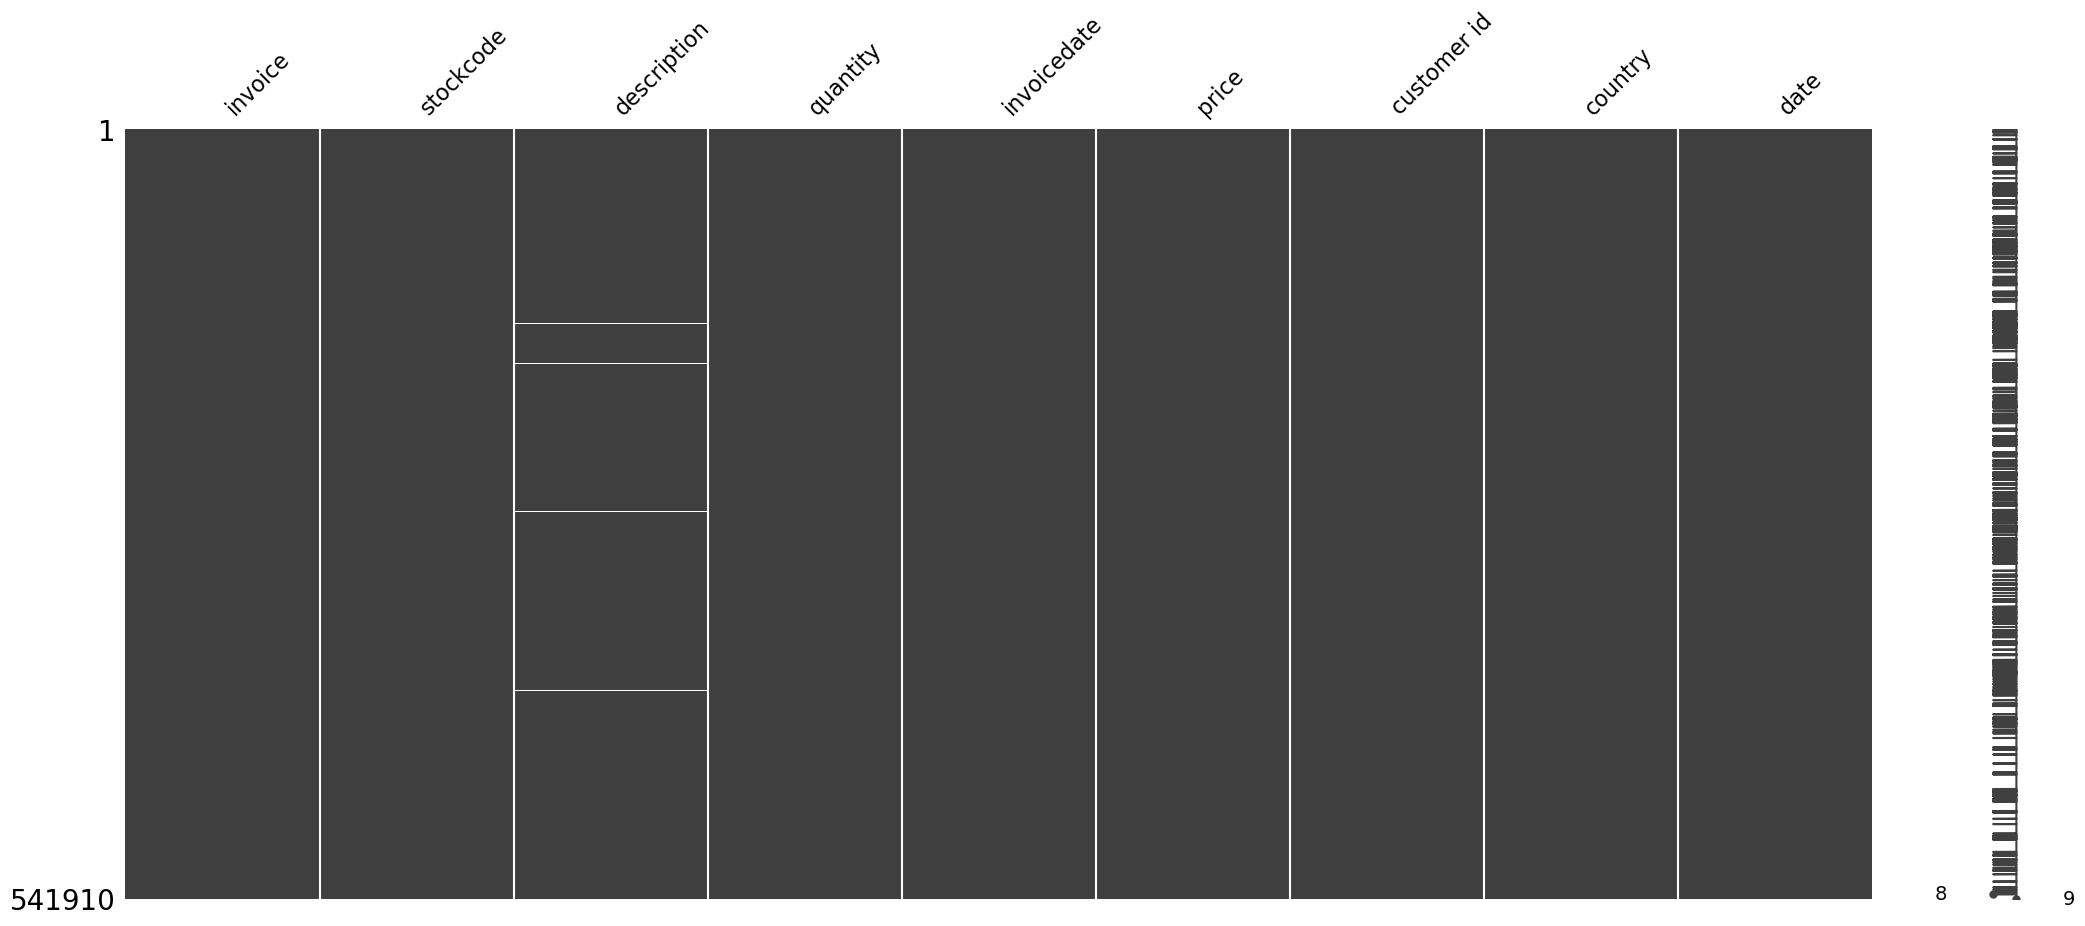

In [30]:
# missing value
msno.matrix(df.sort_values('date'))
# outliers


In [34]:
df[df['description'].isnull()].shape[0]/df.shape[0]

0.002683102360170508

In [36]:
df.isnull().sum()

invoice           0
stockcode         0
description    1454
quantity          0
invoicedate       0
price             0
customer id       0
country           0
date              0
dtype: int64

In [39]:
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))


invoice
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
559414        1
C559417       1
536866        1
563934        1
C558901       1
Name: count, Length: 25900, dtype: int64
stockcode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
23617        1
90214U       1
47591b       1
23449        1
84546        1
Name: count, Length: 4070, dtype: int64
description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
dotcom sales                             1
LIGHT DECORATION BATTERY OPERATED        1
ASSORTED TUTTI FRUTTI ROUND BOX          1
RUBY GLASS CLUSTER NECKLACE              1
PINK BERTIE MOBILE PHONE CHARM           1
Name: count, Length: 4223, dtype: int64
quantity
 1        148228
 2       

<Axes: xlabel='date'>

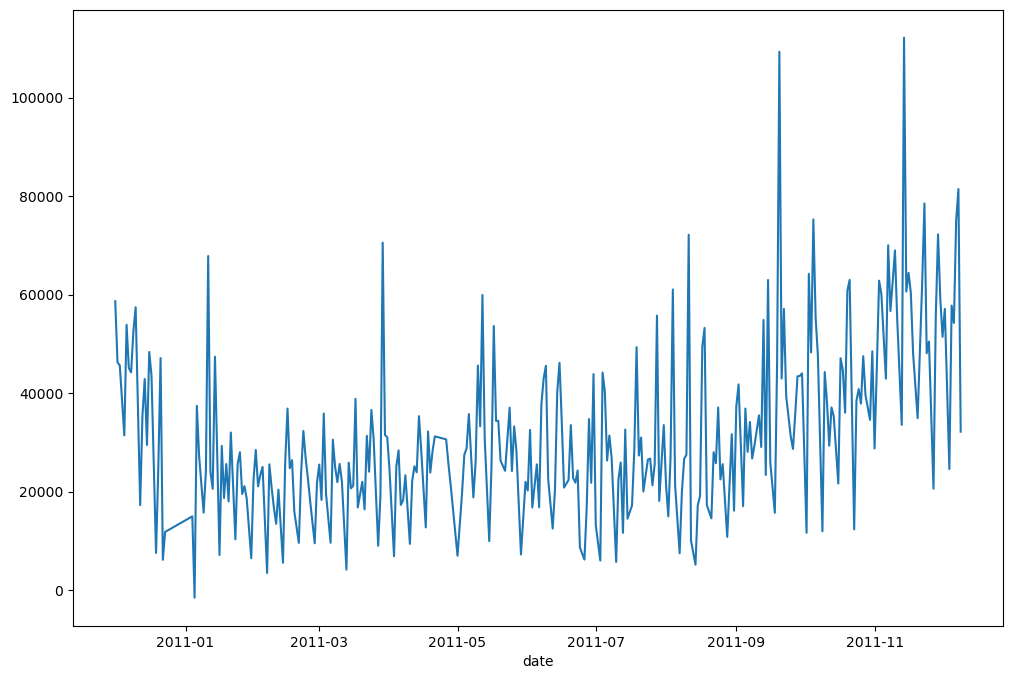

In [85]:
plt.figure(figsize=(12,8))
df.groupby('date')['sales'].sum().plot(kind='line')

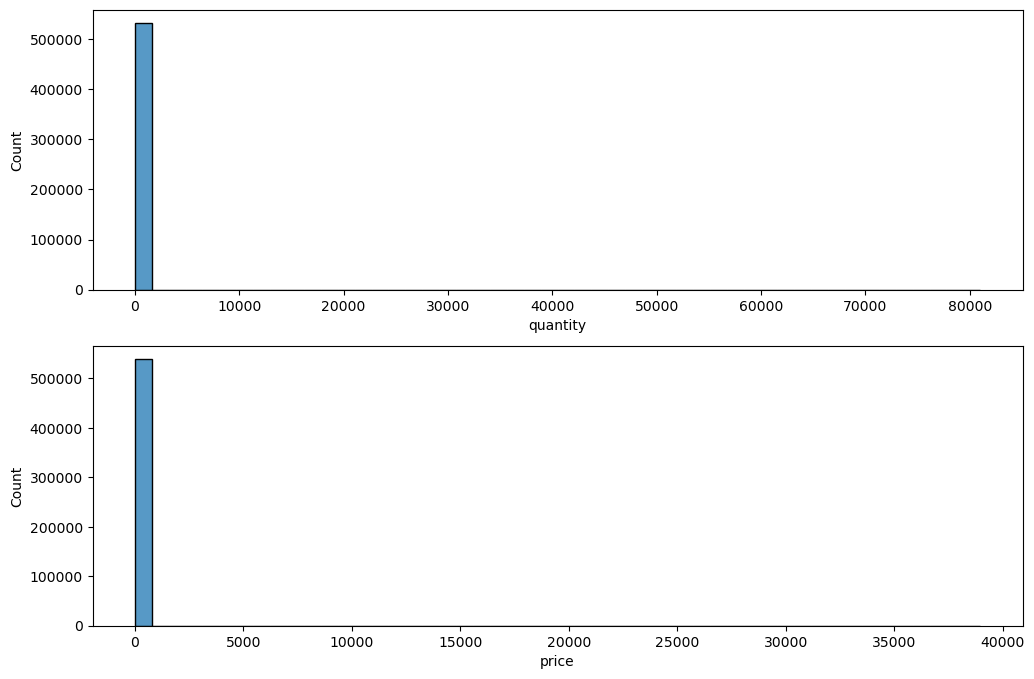

In [105]:
fig, ax = plt.subplots(ncols=1,nrows=2, figsize = (12,8))
for i,col in zip([0,1],df.select_dtypes('number')):
    sns.histplot(df[df[col]>0][col], bins=50, ax = ax[i])

In [60]:
print(df[df['price']<=0].shape[0]/df.shape[0])#['invoicedate'].value_counts().sort_values('invoicedate')
print(df[df['quantity']<=0].shape[0]/df.shape[0])#['invoicedate'].value_counts().sort_values('invoicedate')



0.004644682696388699
0.019604731412965253


<Axes: xlabel='country'>

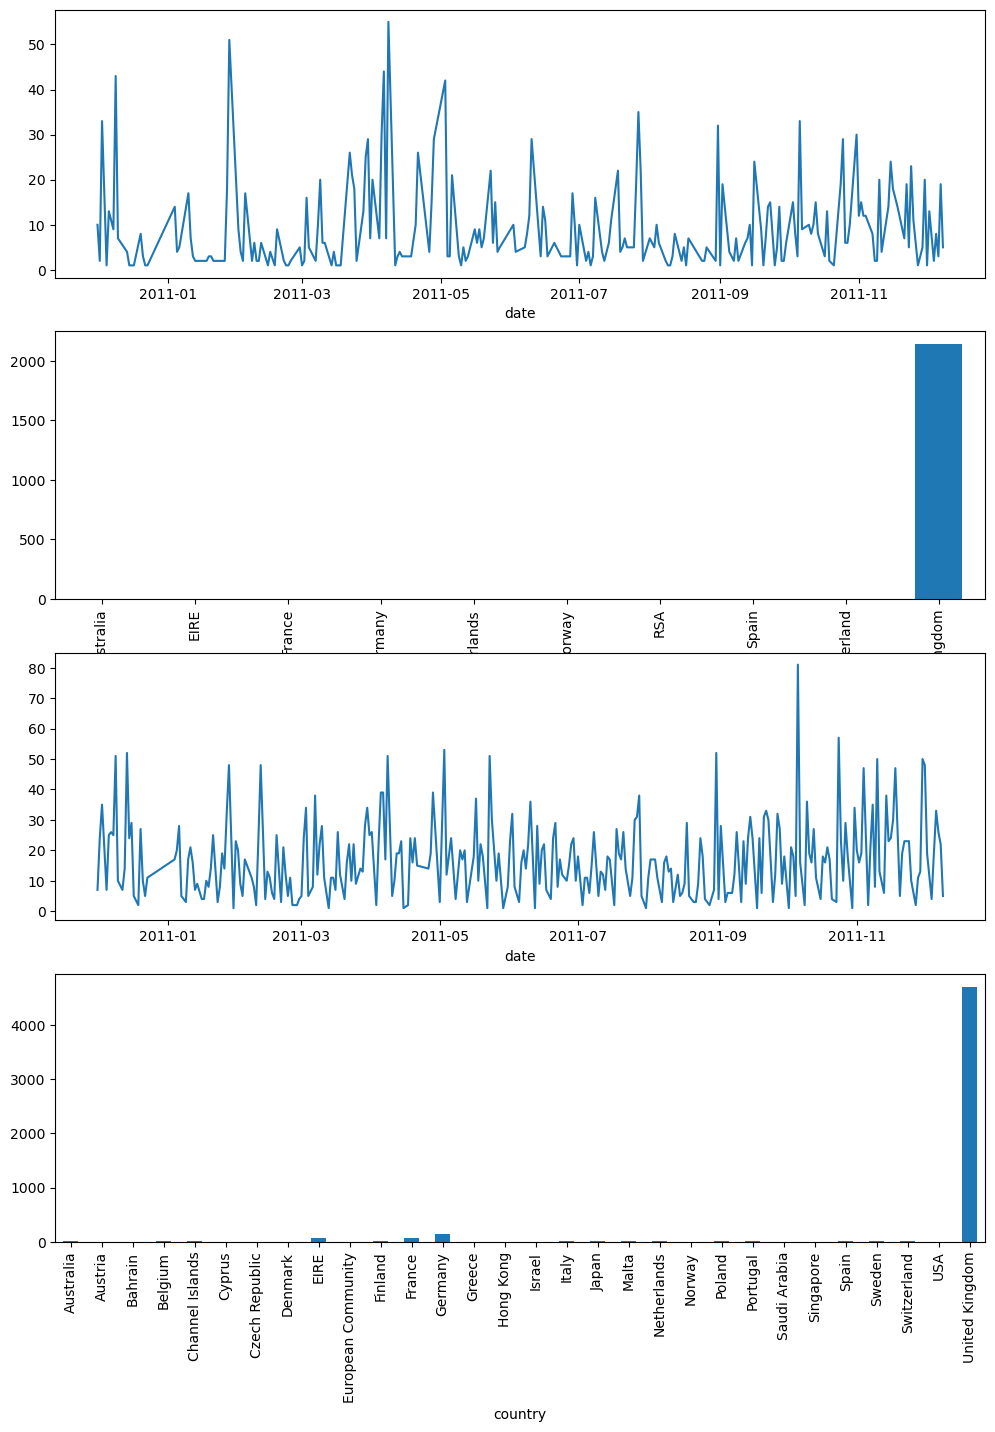

In [104]:
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(12,16))
df[df['price']<=0].groupby('date')['invoice'].nunique().plot(kind='line', ax = ax[0])
df[df['price']<=0].groupby('country')['invoice'].nunique().plot(kind='bar', ax = ax[1])
df[df['quantity']<0].groupby('date')['invoice'].nunique().plot(kind='line', ax = ax[2])
df[df['quantity']<=0].groupby('country')['invoice'].nunique().plot(kind='bar', ax = ax[3])

<Axes: xlabel='date'>

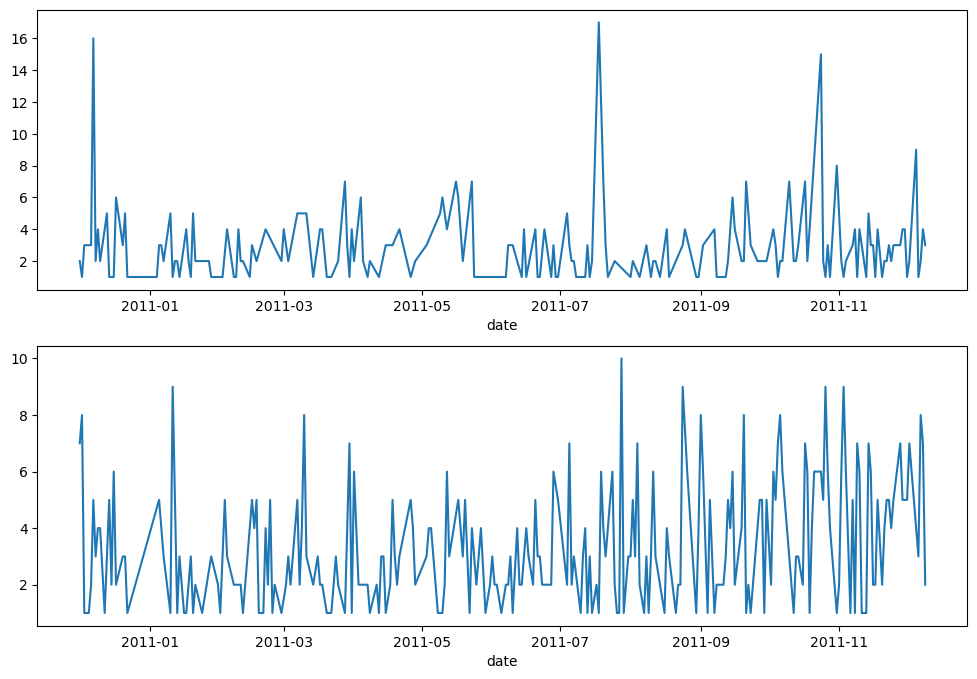

In [135]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(12,8))
df[df['price']>200].groupby('date')['invoice'].nunique().plot(kind='line', ax = ax[0])
# df[df['price']<=0].groupby('country')['invoice'].nunique().plot(kind='bar', ax = ax[1])
df[df['quantity']>200].groupby('date')['invoice'].nunique().plot(kind='line', ax = ax[1])
# df[df['quantity']<=0].groupby('country')['invoice'].nunique().plot(kind='bar', ax = ax[3])

minus records in price are randomly distributed by date, but all are observed in UK


minus records in quantity are randomly distributed by date, but most of them are also observed in UK

<Axes: >

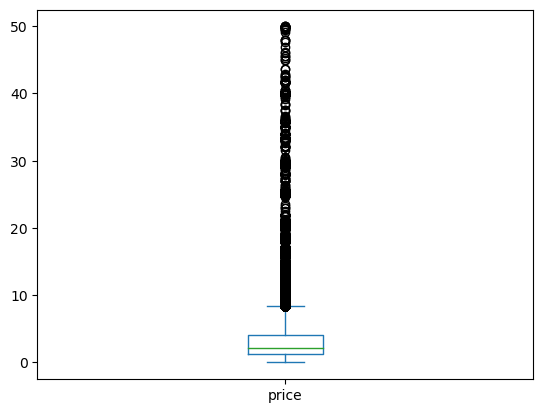

In [122]:
df.query('price >00 & price <50')['price'].plot(kind='box')

<Axes: >

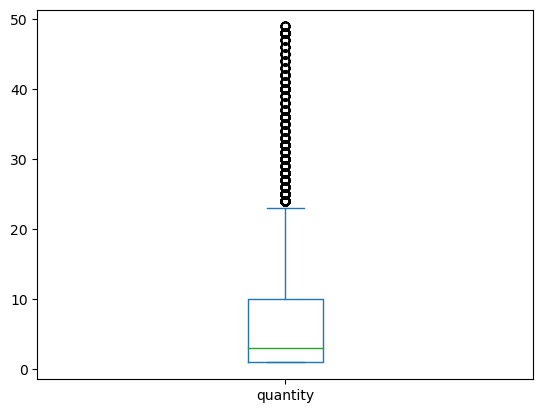

In [127]:
df.query('quantity >00 & quantity <50')['quantity'].plot(kind='box')

# Clean data

In [136]:
# remove minus in quantity
# remove minus in price
# remove outliers in price
# remove duplicates
# remove minus records in quantity
df1 = df.query('price>0 & quantity>0 & price <200 & quantity <200').drop_duplicates()



invoice stockcode                          description  quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

            invoicedate  price customer id         country        date  sales  \
0        12/1/2010 8:26   2.55     17850.0  United Kingdom  2010-12-01  15.30   
1        12/1/2010 8:26   3.39     17850.0  United Kingdom  2010-12-01  20.34   
2        12/1/2010 8:26   2.75     17850.0  United Kingdom  2010-12-01  22.00   
3        12/1/2010 8:26   3.39     17850.0  United Kingdom  2010-12-01  20.34   
4        12/1/2010 8:26   3.39     17850.0  United Kingdom  2010-12-01  20.34   
...                 ...    ...         ...             ...         ...    ...   
541905  12/9/2011 12:50   2.10     12680.0          France  2011-12-09  12.60   
541906  12/9/2011 12:50   4.15     12680.0          France  2011-12-09  16.60   
541907  12/9/2011 12:50   4.15     12680.0          France  2011-12-09  16.60   
541908  12/9/2011 12:50   4.95     12680.0          France  2011-12-09  14.85   
541909  12/9/2011 12:50  18.00     12680.0          France  2011-12-09  18.00   

                  datetime  
0      2010-12-01 08:26:00  
1      2010-12-01 08:26:00  
2      2010-12-01 08:26:00  
3      2010-12-01 08:26:00  
4      2010-12-01 08:26:00  
...                    ...  
541905 2011-12-09 12:50:00  
541906 2011-12-09 12:50:00  
541907 2011-12-09 12:50:00  
541908 2011-12-09 12:50:00  
541909 2011-12-09 12:50:00  

[522311 rows x 11 columns]

In [173]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 522311 entries, 0 to 541909
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      522311 non-null  object        
 1   stockcode    522311 non-null  object        
 2   description  522311 non-null  object        
 3   quantity     522311 non-null  int64         
 4   invoicedate  522311 non-null  object        
 5   price        522311 non-null  float64       
 6   customer id  522311 non-null  object        
 7   country      522311 non-null  object        
 8   date         522311 non-null  object        
 9   sales        522311 non-null  float64       
 10  datetime     522311 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 47.8+ MB


In [179]:
df1['date']=pd.to_datetime(df1['date'])

In [146]:
#preprocessing
# view sales by country
top_sale_countries = df1.groupby('country')['sales'].sum().sort_values(ascending=False).head(17).index
top_sale_countries

Index(['United Kingdom', 'EIRE', 'Germany', 'Netherlands', 'France',
       'Australia', 'Switzerland', 'Spain', 'Belgium', 'Norway', 'Portugal',
       'Sweden', 'Japan', 'Finland', 'Channel Islands', 'Denmark', 'Italy'],
      dtype='object', name='country')

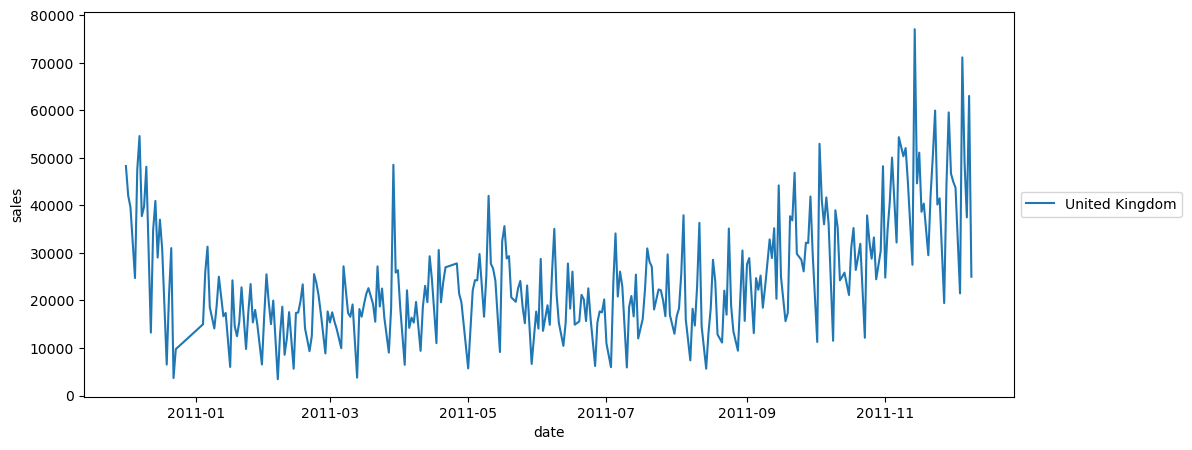

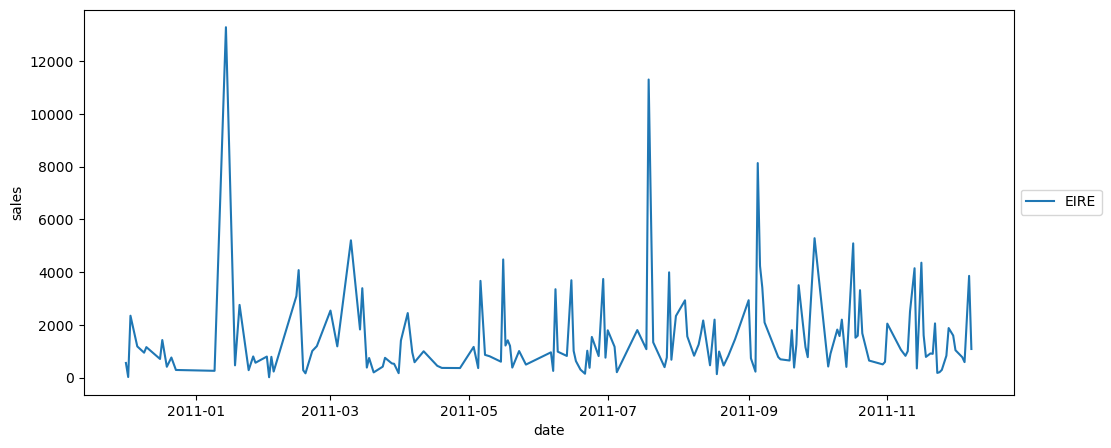

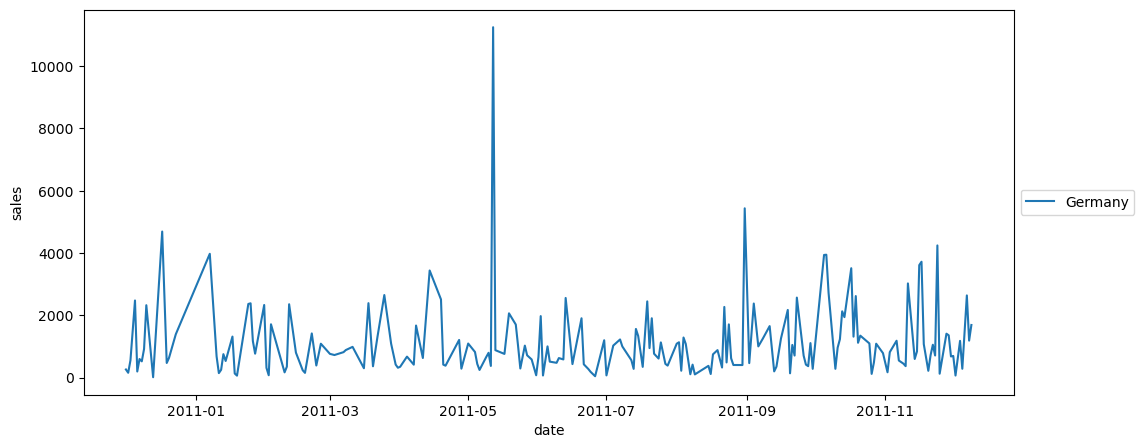

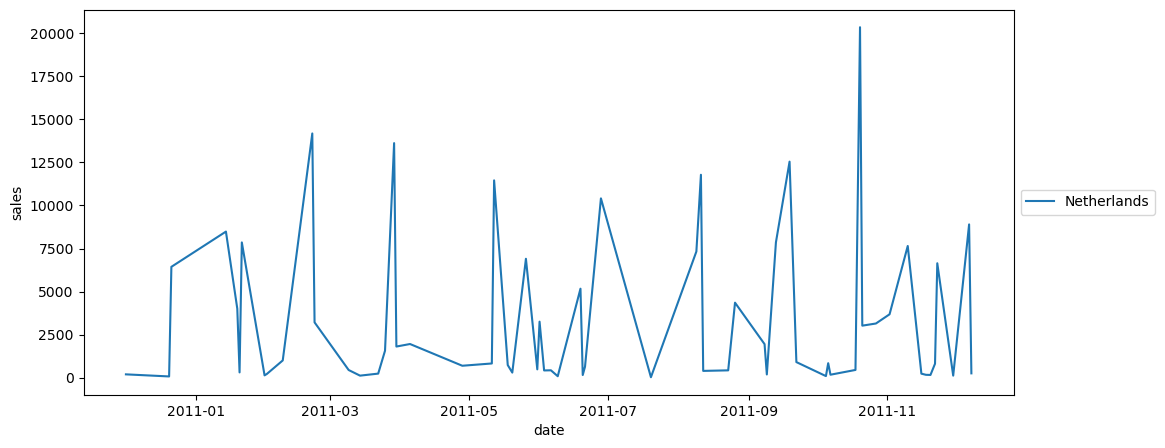

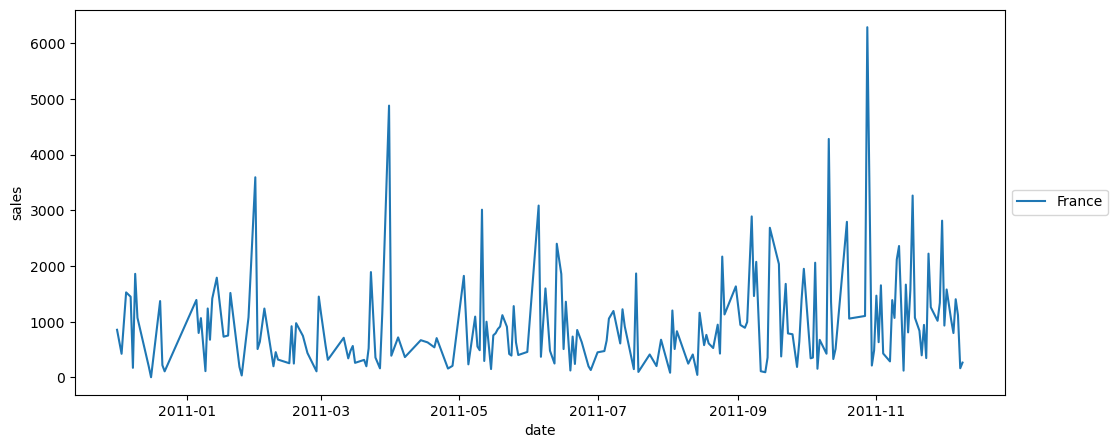

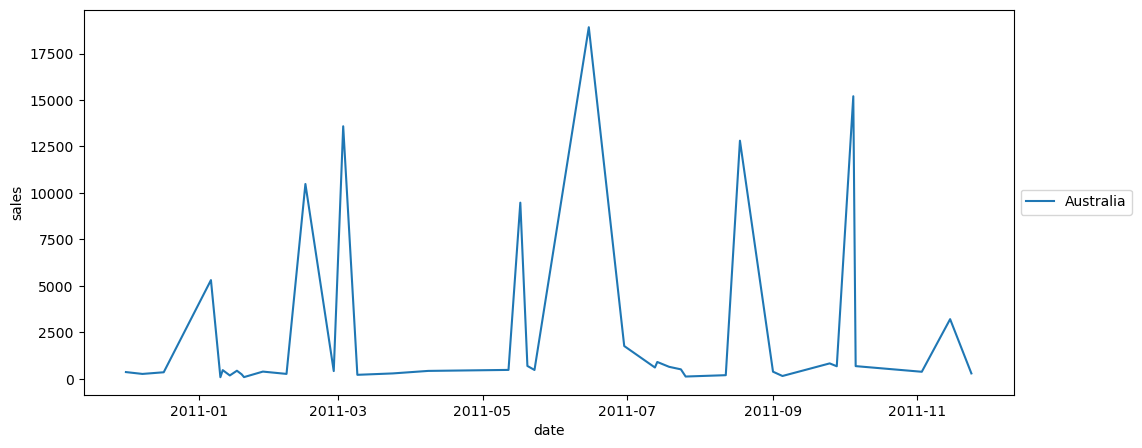

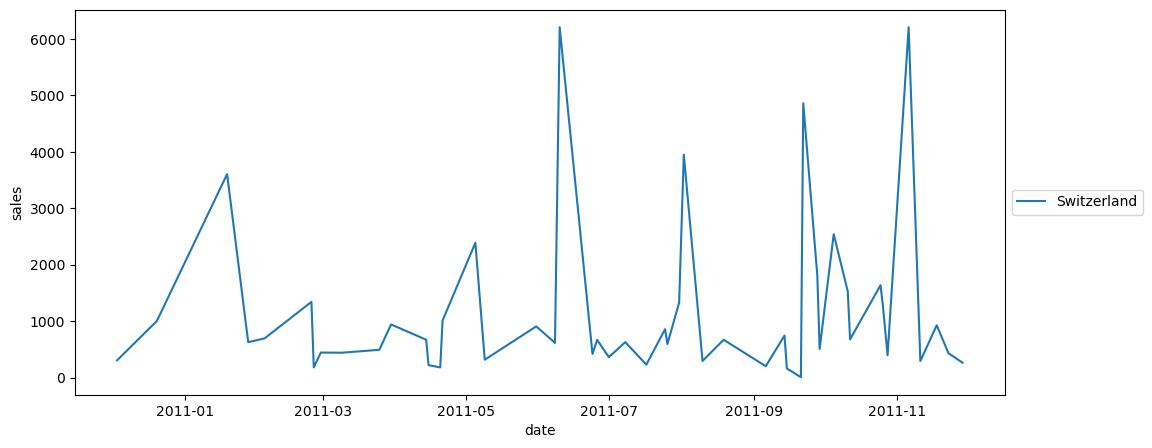

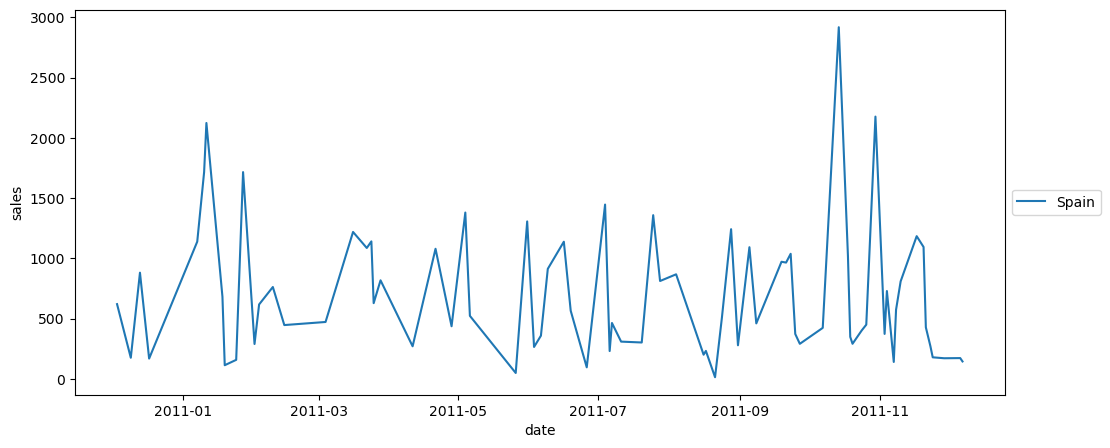

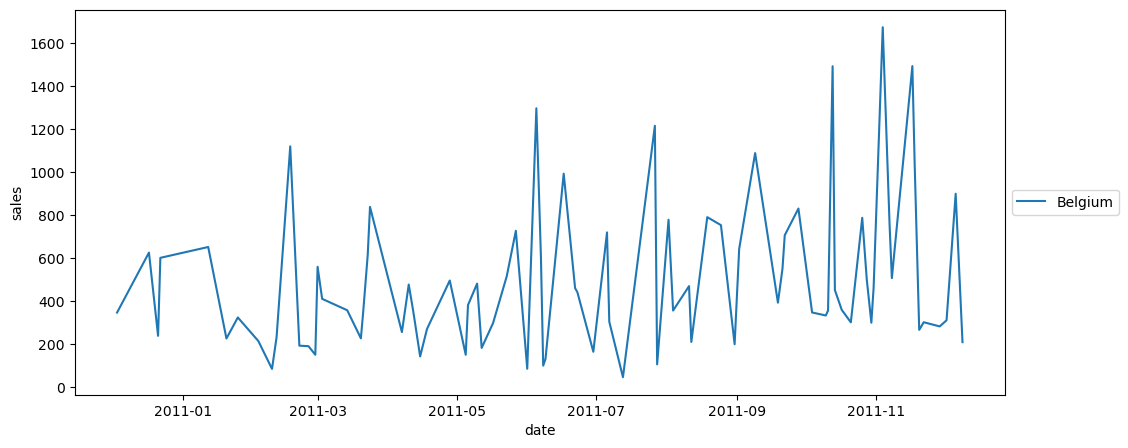

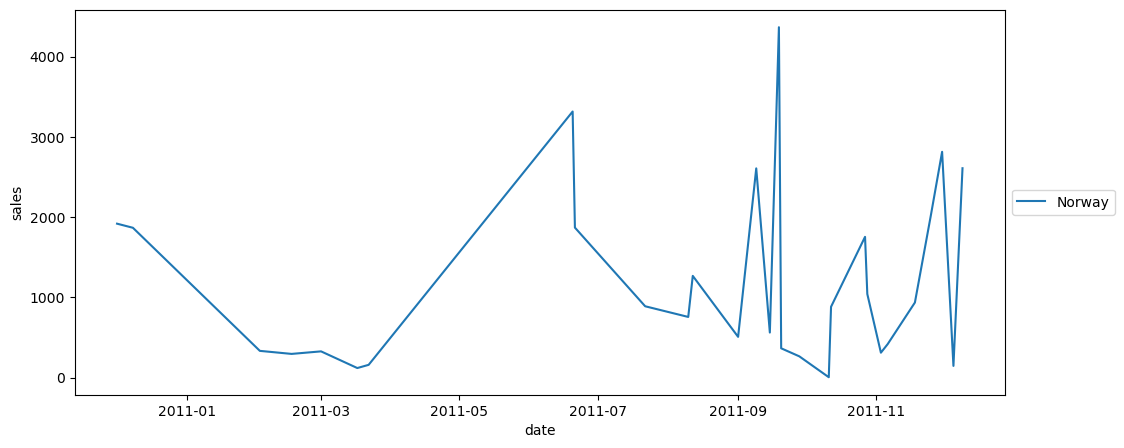

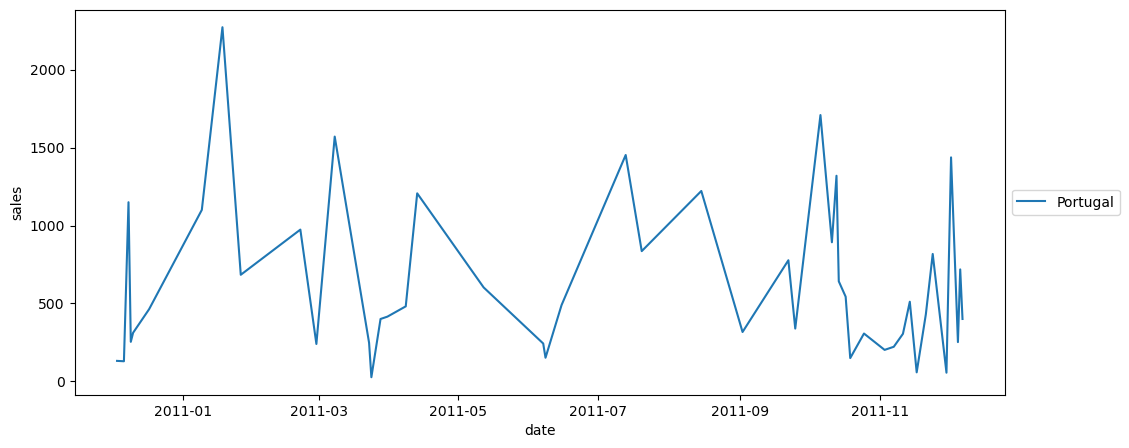

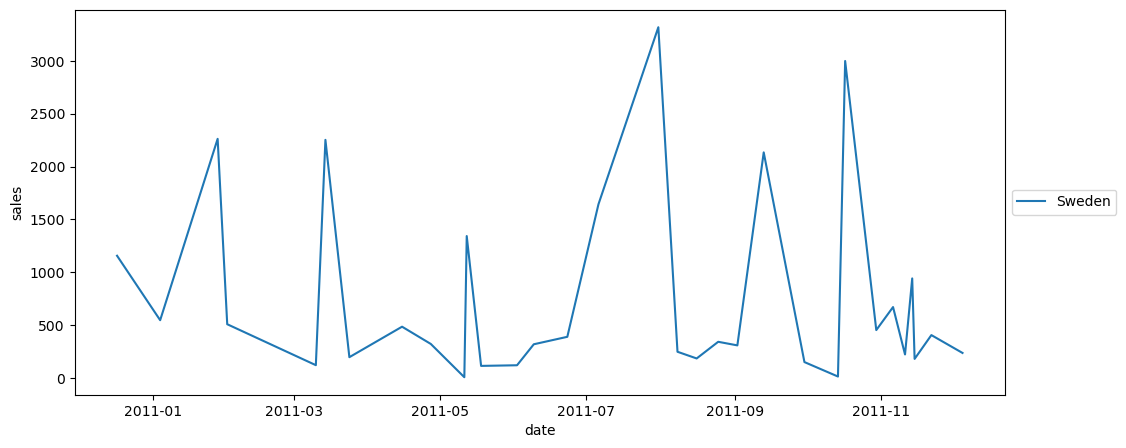

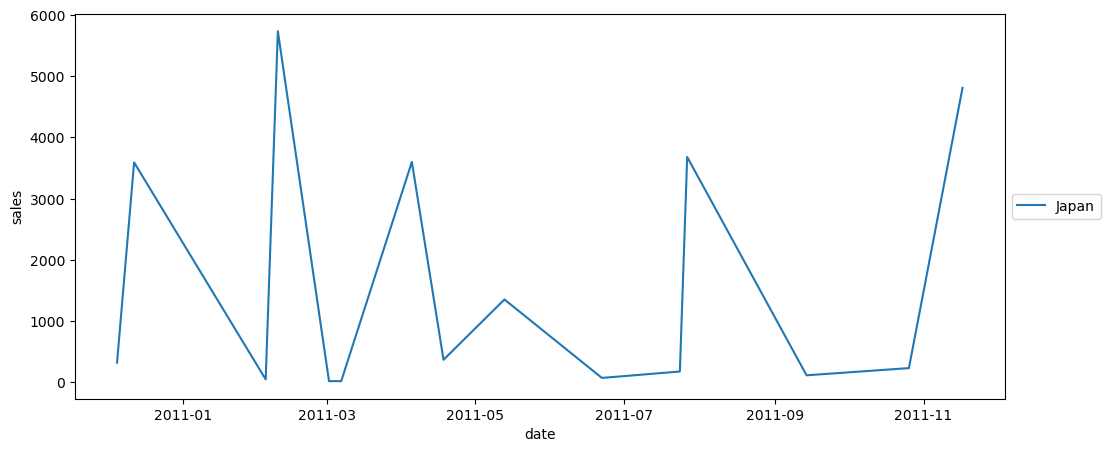

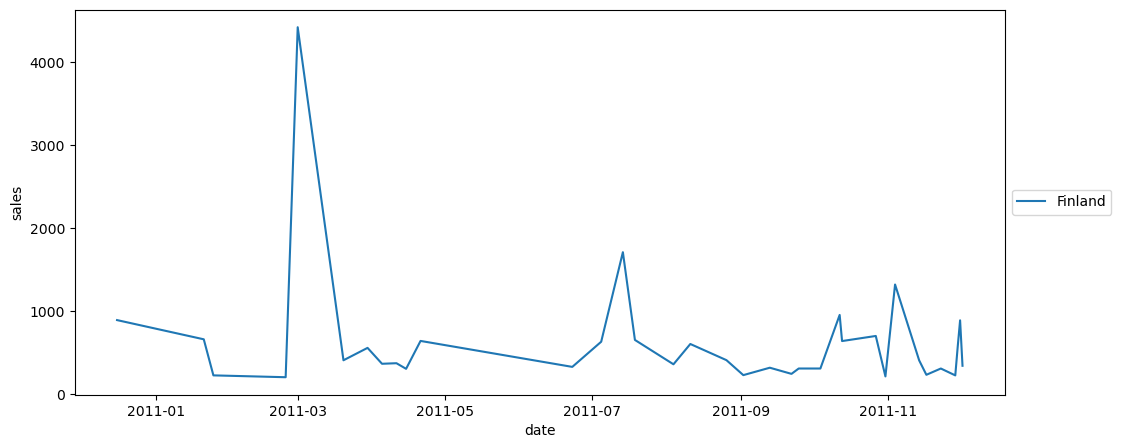

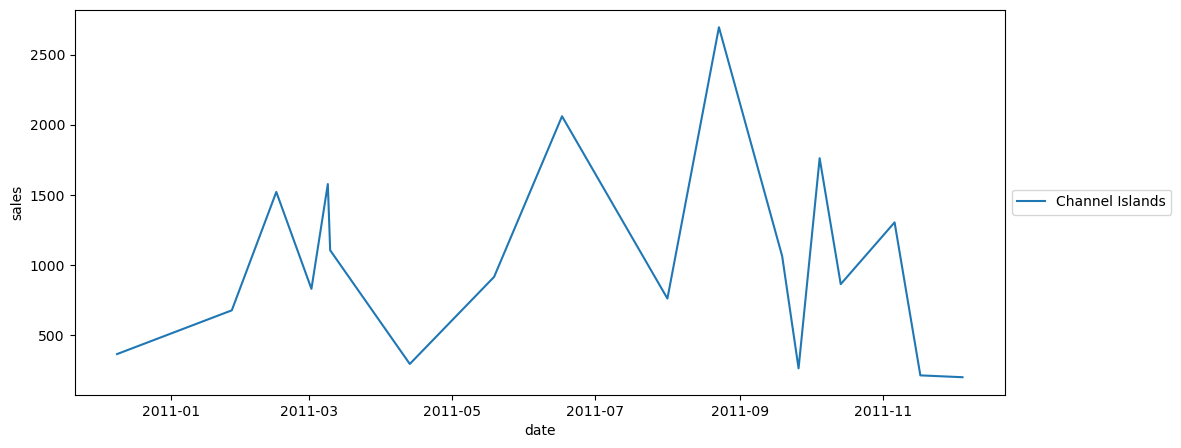

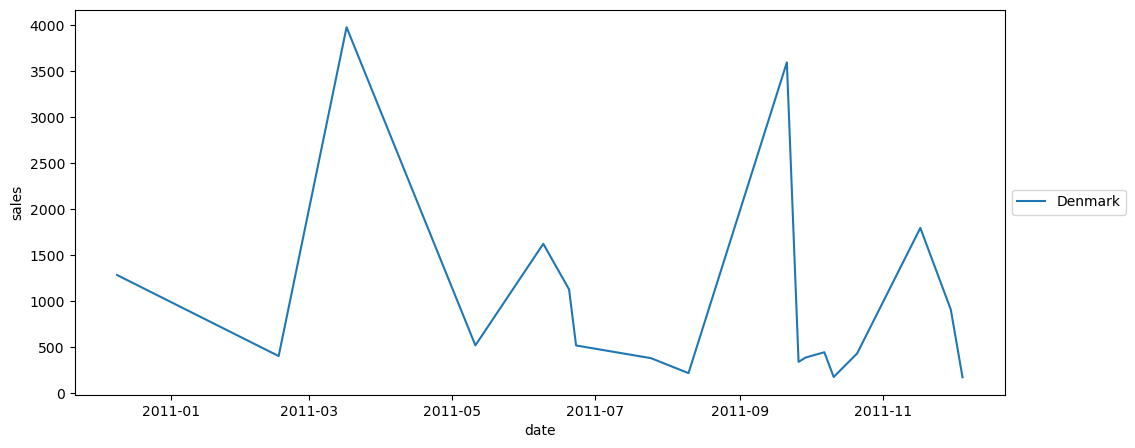

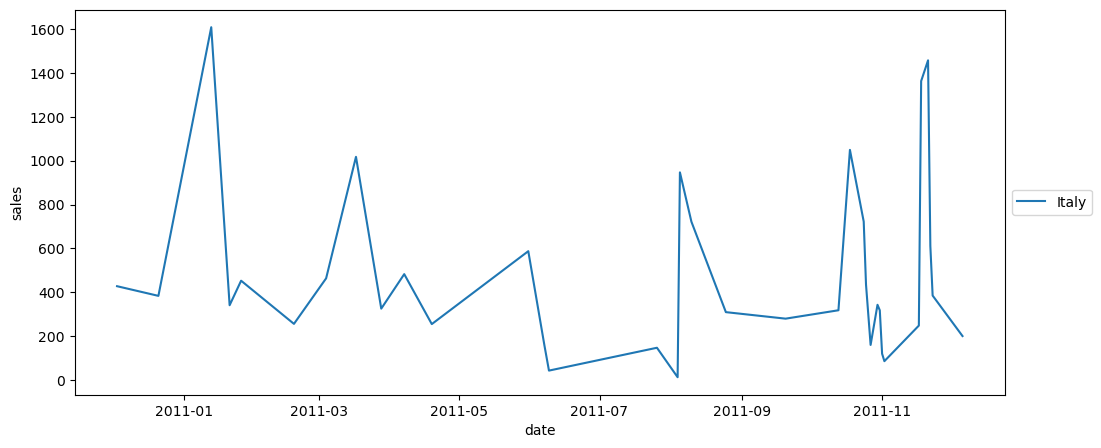

In [154]:

for i in top_sale_countries:
    plt.figure(figsize=(12,5))
    sns.lineplot(data = df1[df1['country']==i].groupby('date')['sales'].sum().reset_index(), x = 'date',y='sales', label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


UK and Belgium show quite apparent trend in sales whereas other countries do not

In [176]:
df2 = df1.groupby('date')[['invoice','stockcode','quantity','price','customer id','sales']].agg({'invoice':'nunique','stockcode':'nunique','quantity':'sum','price':'sum','customer id':'nunique','sales':'sum'}).reset_index()
df2

date  invoice  stockcode  quantity     price  customer id     sales
0    2010-12-01      125       1338     23332  11490.55           96  52414.37
1    2010-12-02      138        921     22405   6231.27           98  42238.06
2    2010-12-03       68       1132     14715   9381.19           51  45027.81
3    2010-12-05       88       1142     14946   7494.78           76  30638.87
4    2010-12-06      102       1470     19828  14601.03           83  48999.71
..          ...      ...        ...       ...       ...          ...       ...
300  2011-12-05      125       1764     37437  18335.19          105  74412.22
301  2011-12-06      115       1418     28320   9102.69          104  53009.97
302  2011-12-07      102       1109     31839   6599.18           93  54761.17
303  2011-12-08      118       1664     29303  16933.18          105  66390.57
304  2011-12-09       43       1079     12713   6341.29           35  29773.24

[305 rows x 7 columns]

In [159]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

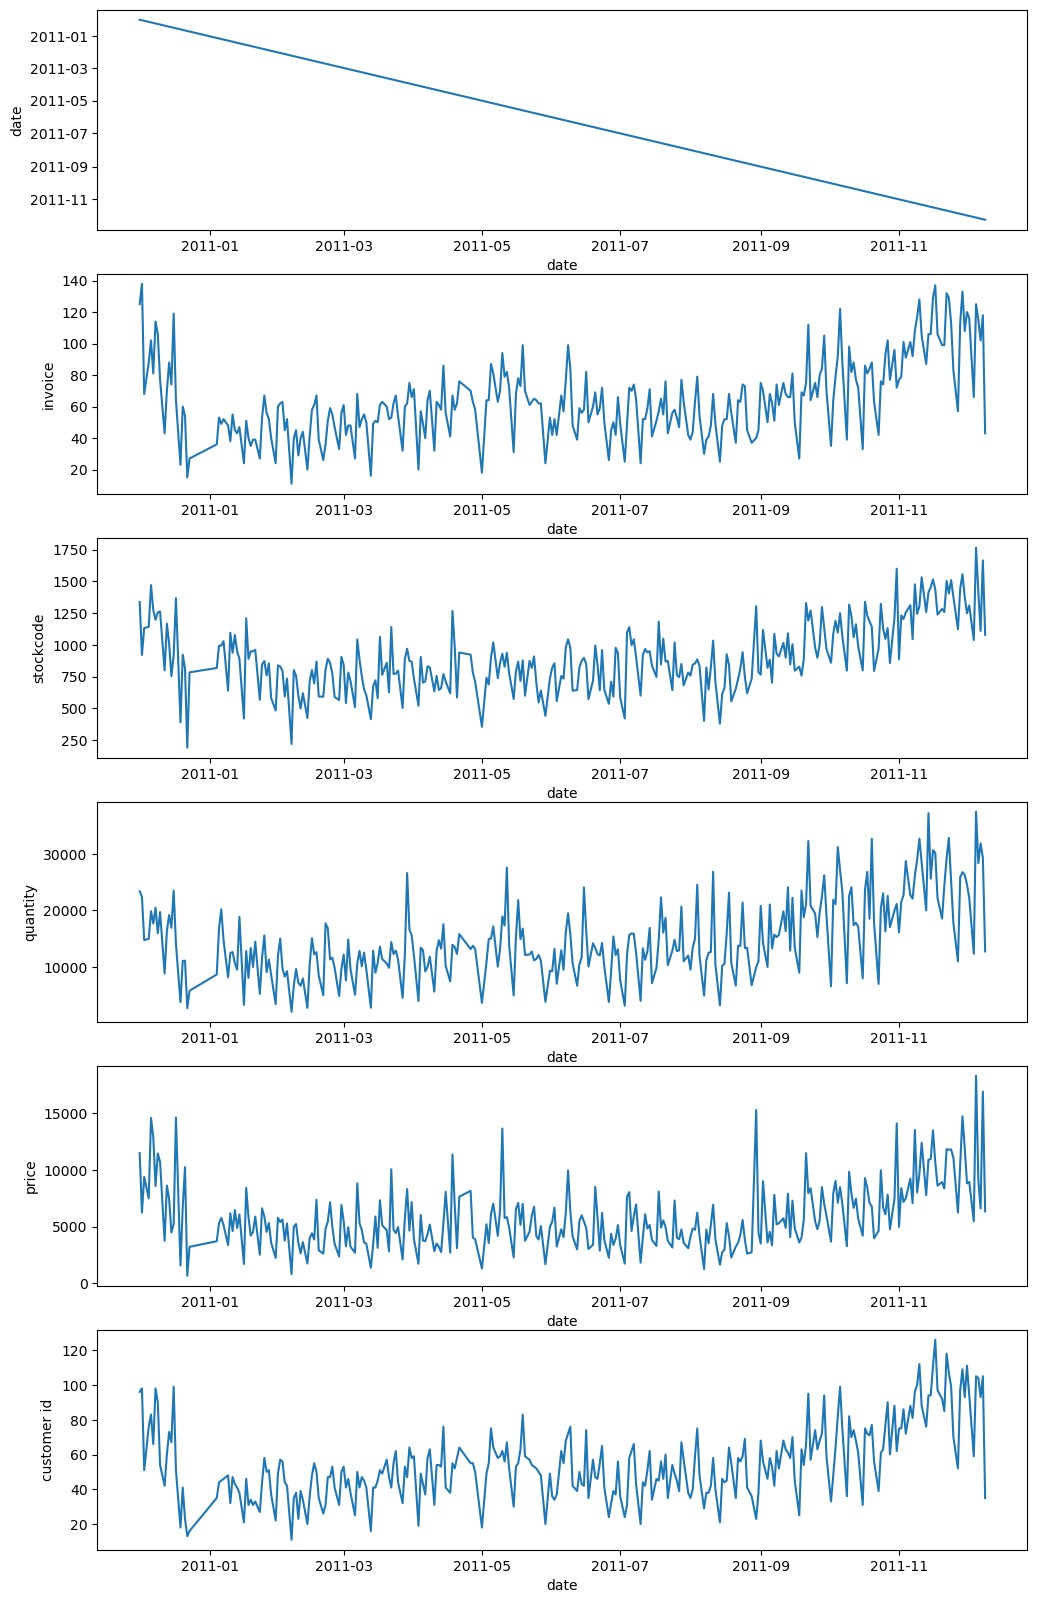

In [177]:
_, ax = plt.subplots(ncols =1, nrows = 6, figsize = (12,20))
for n, col in zip(np.arange(6),df2.columns):
    sns.lineplot(data = df2, x='date', y=col, ax = ax[n])
    
# _, ax = plt.subplots(ncols=1, nrows=6, figsize=(12, 20))
# for i, col in zip(np.arange(6), df2.columns):
#     sns.lineplot(data=df2, x='date', y=col, ax=ax[i])

# Feature engineering



In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         305 non-null    object 
 1   invoice      305 non-null    int64  
 2   stockcode    305 non-null    int64  
 3   quantity     305 non-null    int64  
 4   price        305 non-null    float64
 5   customer id  305 non-null    int64  
 6   sales        305 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 16.8+ KB


In [183]:
df2['date'] = pd.to_datetime(df2['date'])

In [187]:
df3 = create_features(df2,'date')
df3

date  invoice  stockcode  quantity     price  customer id     sales  \
0   2010-12-01      125       1338     23332  11490.55           96  52414.37   
1   2010-12-02      138        921     22405   6231.27           98  42238.06   
2   2010-12-03       68       1132     14715   9381.19           51  45027.81   
3   2010-12-05       88       1142     14946   7494.78           76  30638.87   
4   2010-12-06      102       1470     19828  14601.03           83  48999.71   
..         ...      ...        ...       ...       ...          ...       ...   
300 2011-12-05      125       1764     37437  18335.19          105  74412.22   
301 2011-12-06      115       1418     28320   9102.69          104  53009.97   
302 2011-12-07      102       1109     31839   6599.18           93  54761.17   
303 2011-12-08      118       1664     29303  16933.18          105  66390.57   
304 2011-12-09       43       1079     12713   6341.29           35  29773.24   

     hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  
0       0          2        4     12  2010        335           1          48  
1       0          3        4     12  2010        336           2          48  
2       0          4        4     12  2010        337           3          48  
3       0          6        4     12  2010        339           5          48  
4       0          0        4     12  2010        340           6          49  
..    ...        ...      ...    ...   ...        ...         ...         ...  
300     0          0        4     12  2011        339           5          49  
301     0          1        4     12  2011        340           6          49  
302     0          2        4     12  2011        341           7          49  
303     0          3        4     12  2011        342           8          49  
304     0          4        4     12  2011        343           9          49  

[305 rows x 15 columns]

In [188]:
df3.columns

Index(['date', 'invoice', 'stockcode', 'quantity', 'price', 'customer id',
       'sales', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

([<matplotlib.axis.XTick at 0x3da278810>,
 [Text(15219.0, 0, '2011-09-02'),
  Text(15221.0, 0, '2011-09-04'),
  Text(15222.0, 0, '2011-09-05'),
  Text(15223.0, 0, '2011-09-06'),
  Text(15224.0, 0, '2011-09-07'),
  Text(15225.0, 0, '2011-09-08'),
  Text(15226.0, 0, '2011-09-09'),
  Text(15228.0, 0, '2011-09-11'),
  Text(15229.0, 0, '2011-09-12'),
  Text(15230.0, 0, '2011-09-13'),
  Text(15231.0, 0, '2011-09-14'),
  Text(15232.0, 0, '2011-09-15'),
  Text(15233.0, 0, '2011-09-16'),
  Text(15235.0, 0, '2011-09-18'),
  Text(15236.0, 0, '2011-09-19'),
  Text(15237.0, 0, '2011-09-20'),
  Text(15238.0, 0, '2011-09-21'),
  Text(15239.0, 0, '2011-09-22'),
  Text(15240.0, 0, '2011-09-23'),
  Text(15242.0, 0, '2011-09-25'),
  Text(15243.0, 0, '2011-09-26'),
  Text(15244.0, 0, '2011-09-27'),
  Text(15245.0, 0, '2011-09-28'),
  Text(15246.0, 0, '2011-09-29'),
  Text(15247.0, 0, '2011-09-30'),
  Text(15249.0, 0, '2011-10-02'),
  Text(15250.0, 0, '2011-10-03'),
  Text(15251.0, 0, '2011-10-04'),
  Text

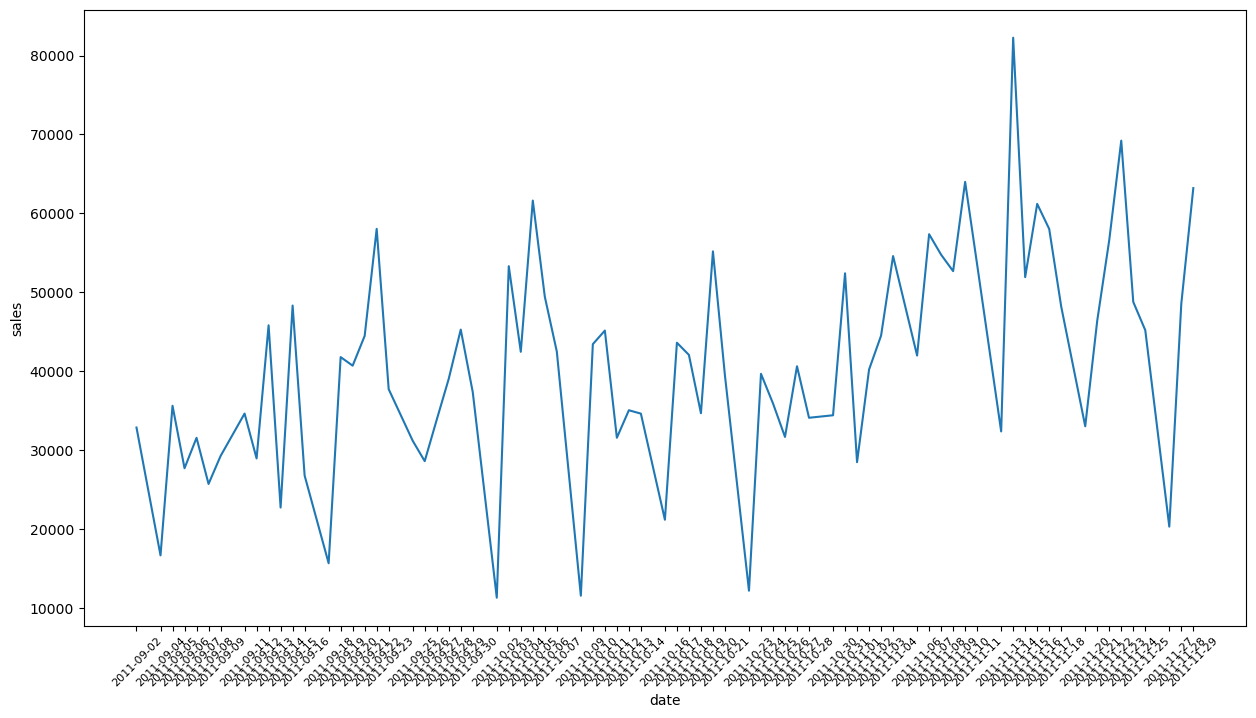

In [204]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df3.query('date > "2011-09-01" and date < "2011-11-30"'), x='date',y='sales')
plt.xticks( df3.query('date > "2011-09-01" and date < "2011-11-30"')['date'], rotation = 45, fontsize=8)


Text(0, 0.5, 'Resid')

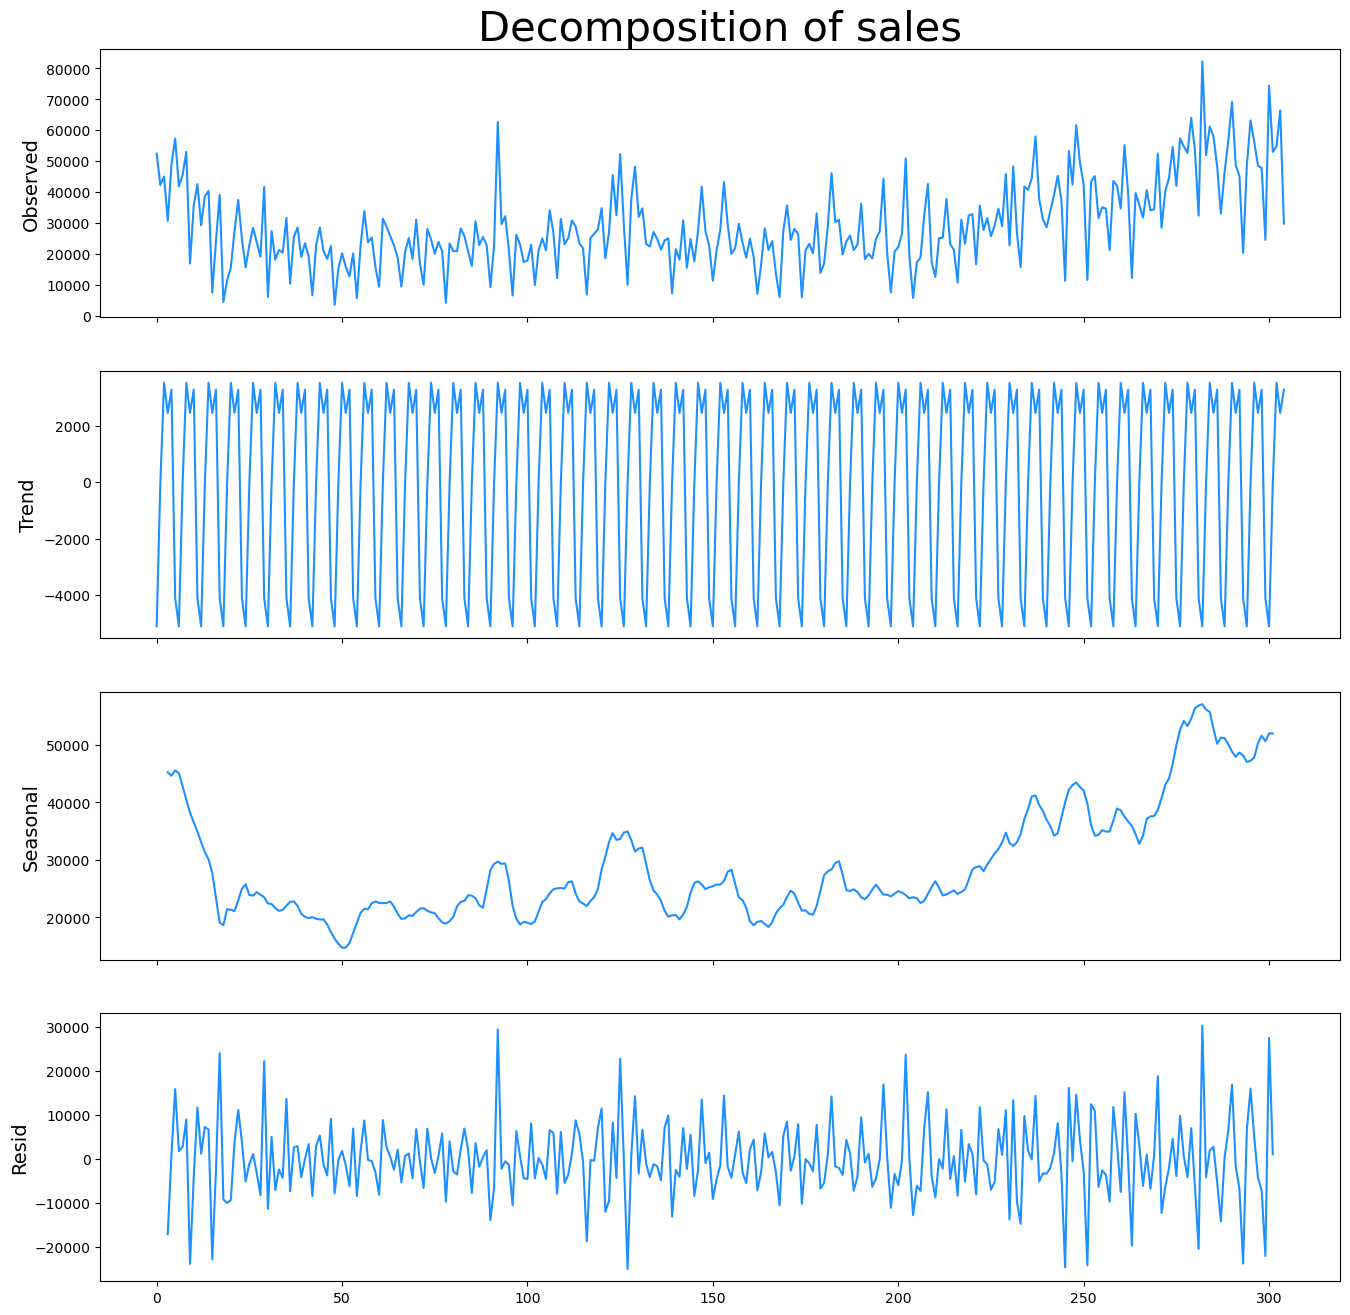

In [233]:
# decomposition
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,16))
res = seasonal_decompose(df3.sales,  model='additive', period=6)
# statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
ax[0].set_title('Decomposition of sales', fontsize=30)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
# ax[0,0].set_ylim([-5, 35])
res.trend.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)



res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Resid', fontsize=14)


In [245]:
df3['trend'] = res.trend 
df3['seasonal'] = res.seasonal.shift(-1)+35000


<Axes: xlabel='date', ylabel='sales'>

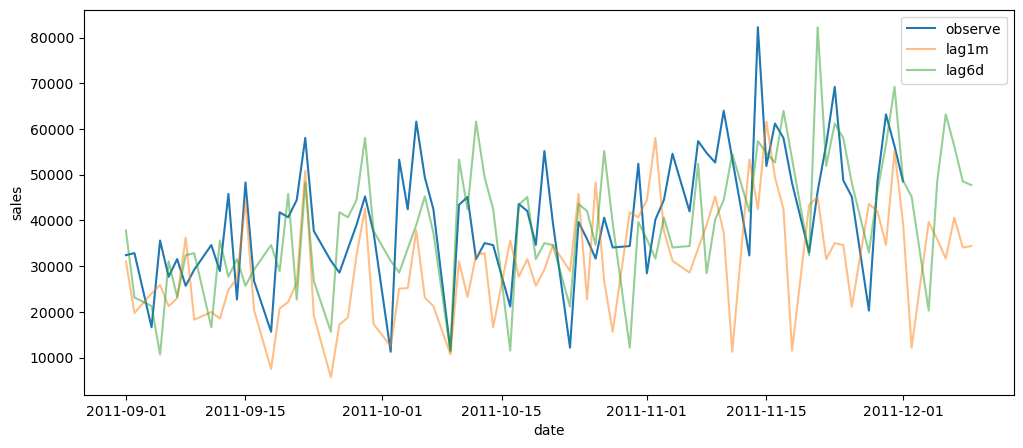

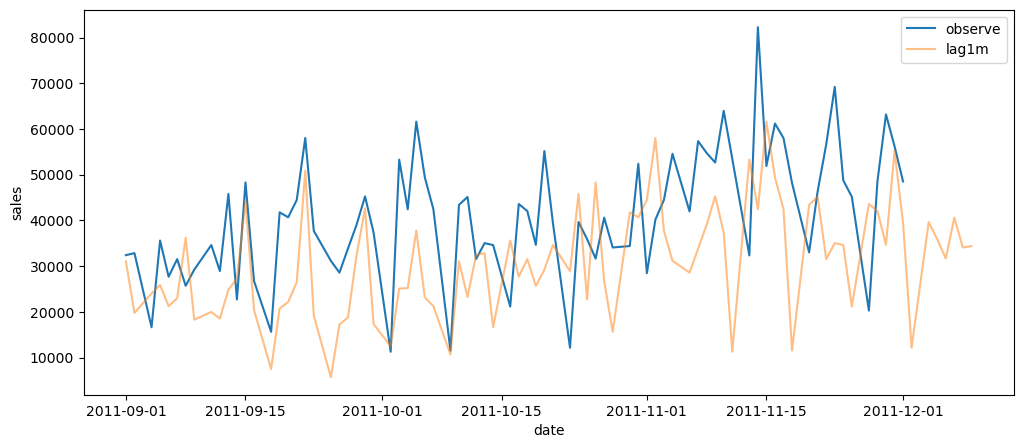

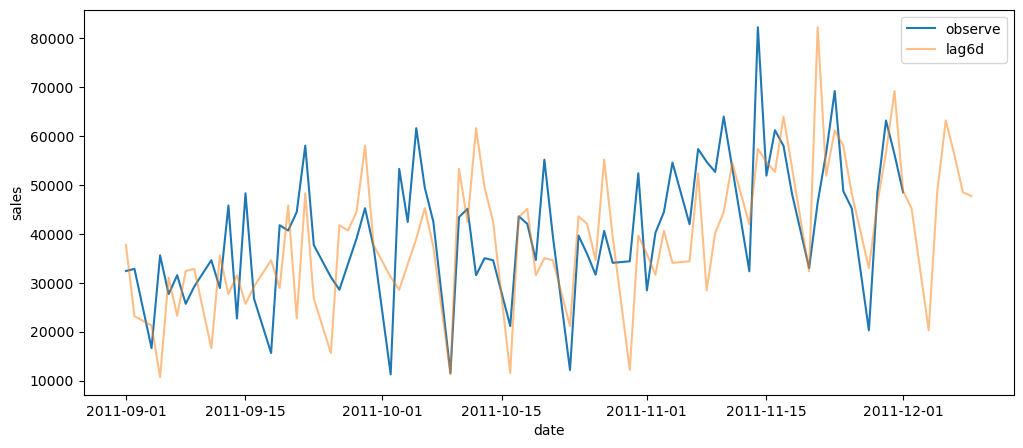

In [229]:
# Autocorrelation detection
# Shift time (there are other features besides time) 
df3['sales_lead_1m'] = df3['sales'].shift(35)
df3['sales_lag_6d'] = df3['sales'].shift(6)

plt.figure(figsize =(12,5))
sns.lineplot(data = df3[(df3['date']<='2011-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales', label='observe')
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales_lead_1m', label='lag1m',alpha=0.5)
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales_lag_6d', label='lag6d',alpha = 0.5)

plt.figure(figsize =(12,5))
sns.lineplot(data = df3[(df3['date']<='2011-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales', label='observe')
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales_lead_1m', label='lag1m',alpha=0.5)
plt.figure(figsize =(12,5))
sns.lineplot(data = df3[(df3['date']<='2011-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales', label='observe')
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales_lag_6d', label='lag6d',alpha = 0.5)



add feature lead 35 days to model 

<Axes: xlabel='date', ylabel='sales'>

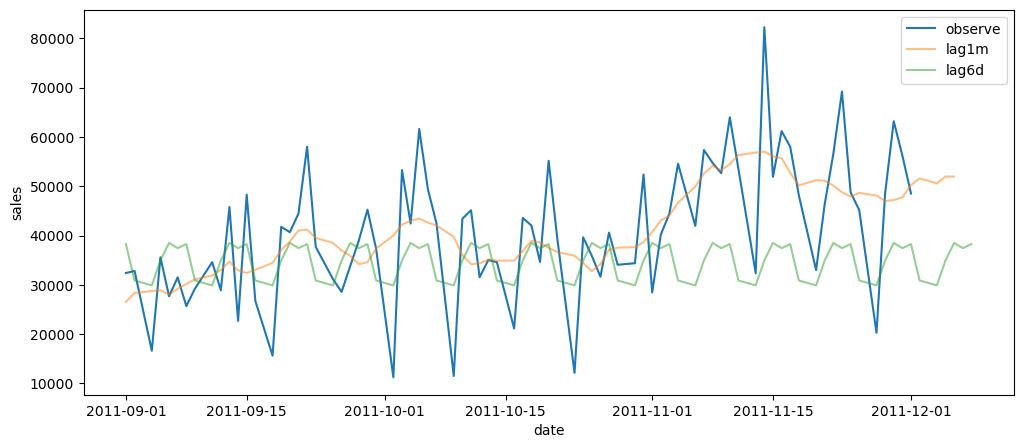

In [246]:

plt.figure(figsize =(12,5))
sns.lineplot(data = df3[(df3['date']<='2011-12-01') & (df3['date']>='2011-09-01')], x='date',y='sales', label='observe')
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='trend', label='lag1m',alpha=0.5)
sns.lineplot(data = df3[(df3['date']<='2019-12-01') & (df3['date']>='2011-09-01')], x='date',y='seasonal', label='lag6d',alpha = 0.5)


<Axes: >

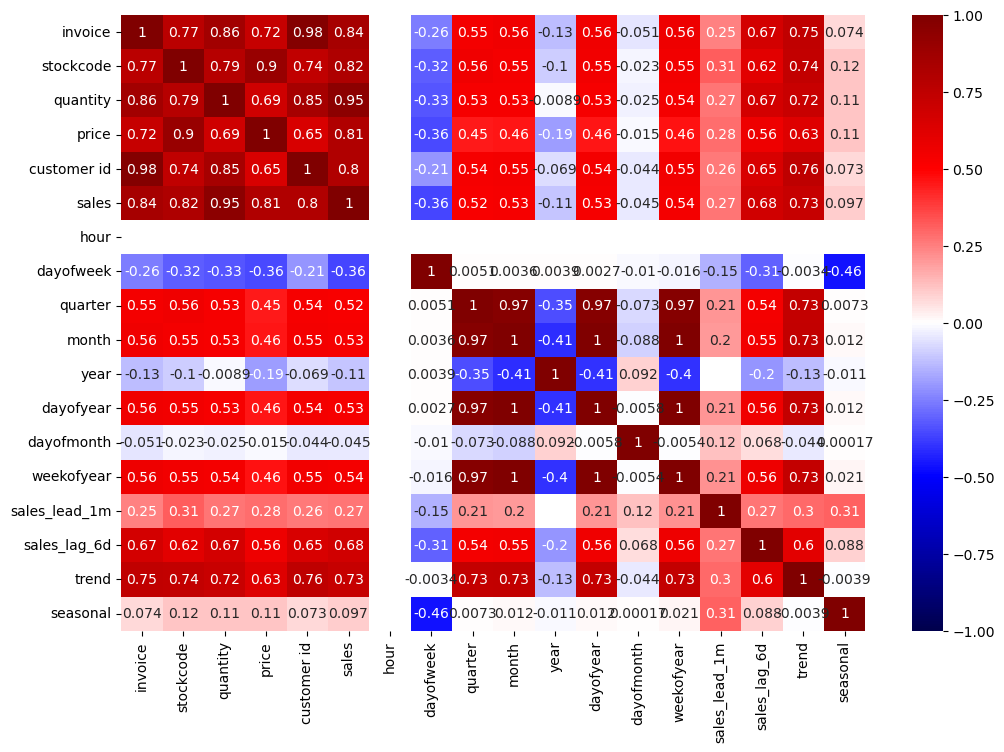

In [269]:
# feature correlation

plt.figure(figsize=(12,8))
sns.heatmap(df3.select_dtypes(include='number').corr(), annot=True,cmap='seismic',vmin=-1, vmax=1)

In [281]:
# feature selection without trend
features = [ 'dayofweek', 'quarter', 'month','year', 'dayofyear','dayofmonth','weekofyear','sales_lead_1m']
target = 'sales'

In [282]:

train = df3[(df3['date']<'2011-11-01')]
test = df3[df3['date']>='2011-11-01']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


# XGBoost

<Axes: xlabel='date', ylabel='sales'>

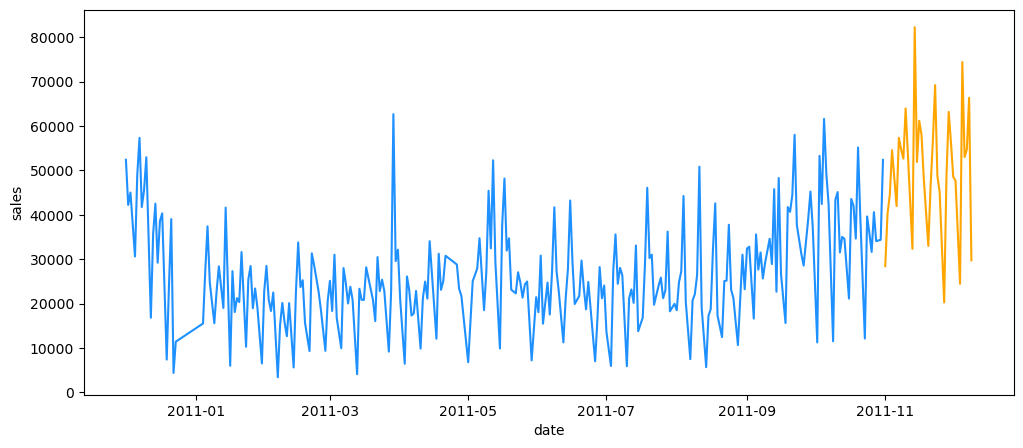

In [253]:
plt.figure(figsize=(12,5))
sns.lineplot( data = train, x = 'date', y = 'sales', color ='dodgerblue')
sns.lineplot( data = test, x = 'date', y = 'sales', color ='orange')

In [283]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=500000,
                       learning_rate=0.002, 
                       random_state = 12)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:29045.12324	validation_1-rmse:52099.85043
[100]	validation_0-rmse:24242.59741	validation_1-rmse:45244.56100
[200]	validation_0-rmse:20354.12374	validation_1-rmse:39597.58401


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:04:32] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:17194.19194	validation_1-rmse:35057.20716
[400]	validation_0-rmse:14624.08503	validation_1-rmse:31256.29365
[500]	validation_0-rmse:12506.52219	validation_1-rmse:28175.25925
[600]	validation_0-rmse:10761.86257	validation_1-rmse:25719.55360
[700]	validation_0-rmse:9302.69280	validation_1-rmse:23838.64955
[800]	validation_0-rmse:8076.66355	validation_1-rmse:22258.75133
[900]	validation_0-rmse:7037.85705	validation_1-rmse:20976.25934
[1000]	validation_0-rmse:6140.37142	validation_1-rmse:19891.84564
[1100]	validation_0-rmse:5386.33388	validation_1-rmse:19021.62561
[1200]	validation_0-rmse:4734.76648	validation_1-rmse:18345.26360
[1300]	validation_0-rmse:4170.64513	validation_1-rmse:17840.82904
[1400]	validation_0-rmse:3668.64102	validation_1-rmse:17452.67329
[1500]	validation_0-rmse:3232.00653	validation_1-rmse:17199.25012
[1600]	validation_0-rmse:2848.96382	validation_1-rmse:17078.94902
[1700]	validation_0-rmse:2515.99650	validation_1-rmse:17009.60592
[1800]	valida

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.002, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500000, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

/tmp/ipykernel_12011/3904646303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


<Axes: xlabel='date', ylabel='sales'>

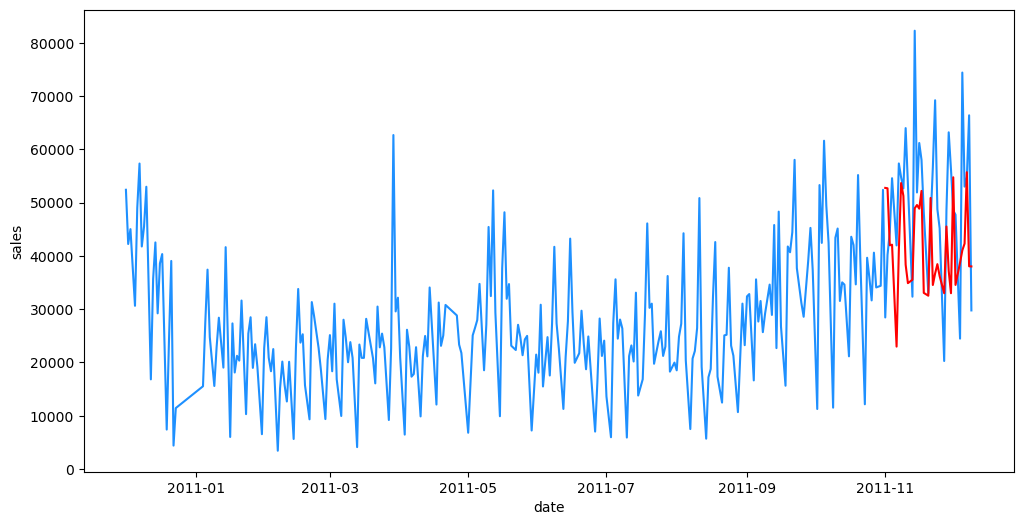

In [284]:
test['prediction'] = reg.predict(X_test)
combine = pd.concat([train,test])
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine,x='date',y='sales', color ='dodgerblue')
sns.lineplot(data = combine,x='date',y='prediction', color ='red')


In [286]:
# scoring

y_true=test['sales']
y_pred=test['prediction']
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true, y_pred)

27.645197547657567

Quite high error

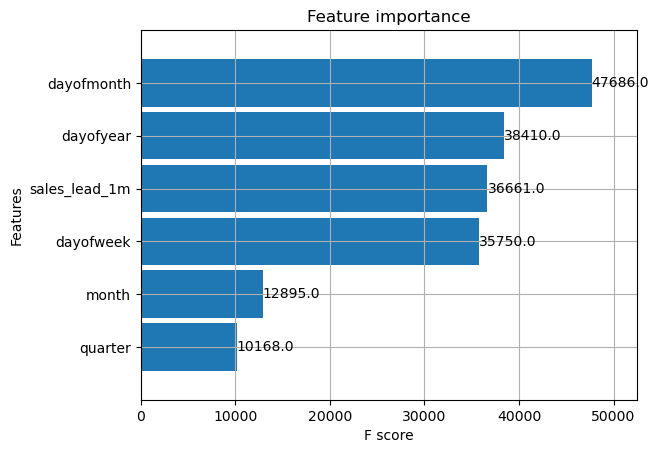

In [287]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
_ = plot_importance(reg, height=0.9)

In [ ]:
# This time only select importance features & add trend


[0]	validation_0-rmse:13474.88841	validation_1-rmse:29322.45676
[10]	validation_0-rmse:138.25738	validation_1-rmse:12112.85612


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/tmp/ipykernel_12011/1400068343.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


<Axes: xlabel='date', ylabel='sales'>

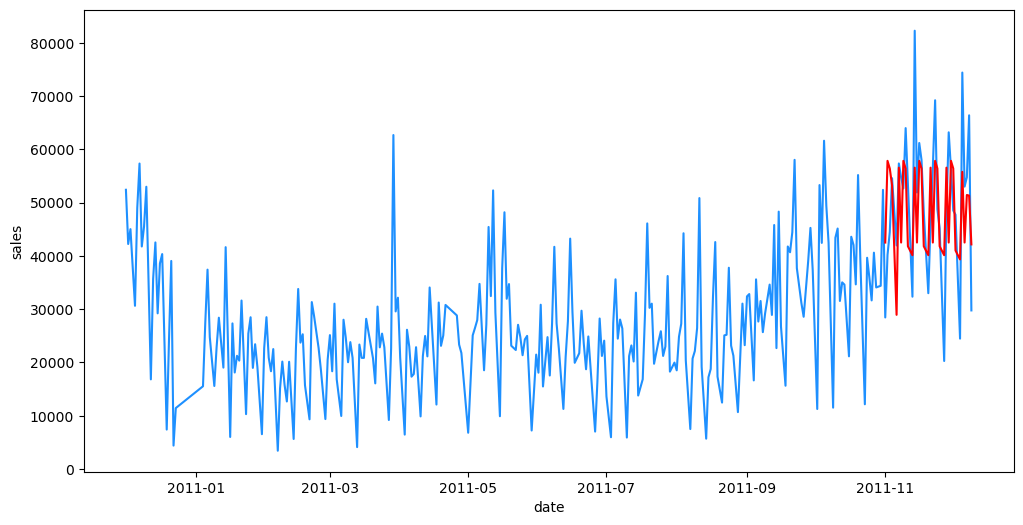

In [322]:
# feature selection without trend
features = [ 'dayofweek', 'quarter', 'month', 'dayofyear','dayofmonth','sales_lead_1m','trend','seasonal']
target = 'sales'

train = df3[(df3['date']<'2011-11-01')]
test = df3[df3['date']>='2011-11-01']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=200000,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=100,
                       learning_rate=0.6, 
                       random_state = 2)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
test['prediction'] = reg.predict(X_test)
combine = pd.concat([train,test])
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine,x='date',y='sales', color ='dodgerblue')
sns.lineplot(data = combine,x='date',y='prediction', color ='red')


In [323]:
# scoring

y_true=test['sales']
y_pred=test['prediction']
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true, y_pred)

22.940688650922247

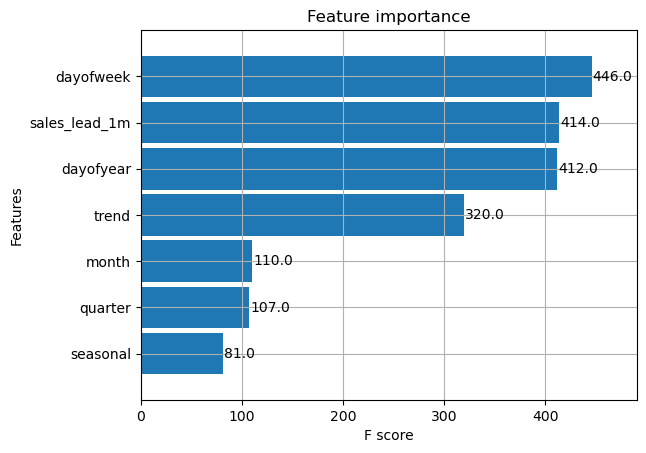

In [321]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
_ = plot_importance(reg, height=0.9)

In [ ]:
# product 

In [333]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
# tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [i*2 for i in np.arange(1,5)],
    'learning_rate': [i*0.2 for i in np.arange(1,5)],
    'n_estimators': [i*200 for i in np.arange(1,5)]
}

model = xgb.XGBRegressor(objective='reg:linear', random_state=2)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
warnings.simplefilter("default")


# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


KeyboardInterrupt: 

[0]	validation_0-rmse:26412.11841	validation_1-rmse:48308.35881
[70]	validation_0-rmse:4446.10249	validation_1-rmse:11863.04992


<Axes: xlabel='date', ylabel='sales'>

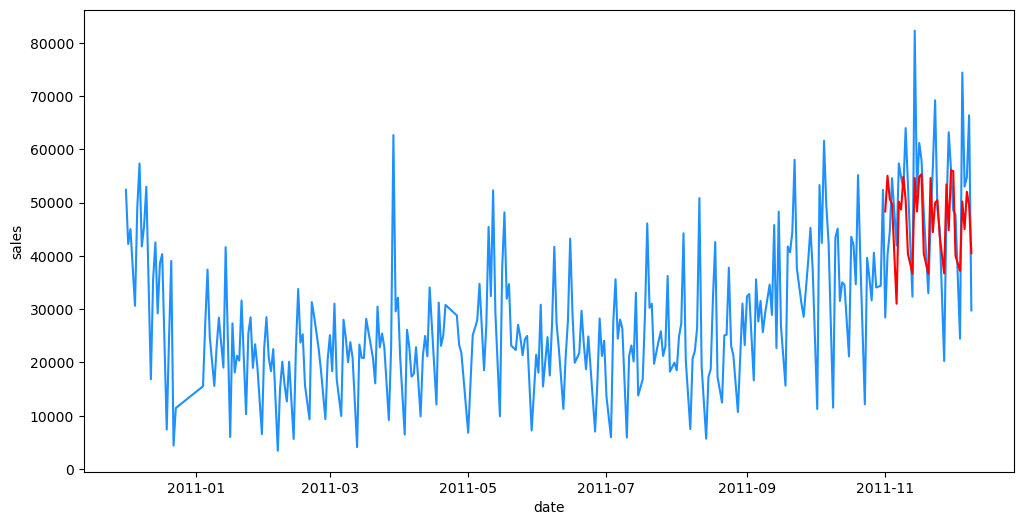

In [334]:
# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.1, 
                       random_state = 2)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
test['prediction'] = reg.predict(X_test)
combine = pd.concat([train,test])
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine,x='date',y='sales', color ='dodgerblue')
sns.lineplot(data = combine,x='date',y='prediction', color ='red')


In [336]:
# scoring

y_true=test['sales']
y_pred=test['prediction']
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true, y_pred)

21.067753836261794

[0]	validation_0-rmse:21103.75147	validation_1-rmse:40629.70617
[25]	validation_0-rmse:4189.12164	validation_1-rmse:10862.12408


<Axes: xlabel='date', ylabel='sales'>

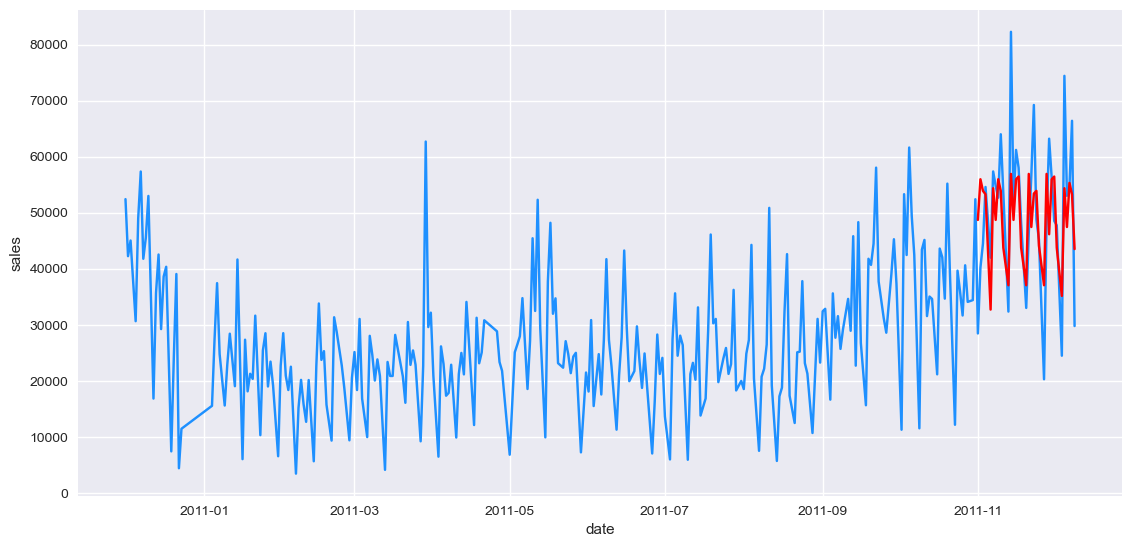

In [416]:
# feature selection  trend
features = [ 'dayofweek', 'quarter', 'month', 'dayofyear','sales_lead_1m','trend','seasonal']
target = 'sales'

train = df3[(df3['date']<'2011-11-01')]
test = df3[df3['date']>='2011-11-01']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=200000,
                       early_stopping_rounds=5,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.3, 
                       random_state =2)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
test['prediction'] = reg.predict(X_test)
combine = pd.concat([train,test])
_, ax = plt.subplots(ncols=1, nrows =1, figsize=(12,6))
sns.lineplot(data = combine,x='date',y='sales', color ='dodgerblue')
sns.lineplot(data = combine,x='date',y='prediction', color ='red')


In [417]:
y_true=test['sales']
y_pred=test['prediction']
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true, y_pred)

19.750402889364448

# Prophet


In [341]:
# !pip install fbprophet
!pip install prophet



  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c4/ef/c7a0349eec94535d37498a06c033dab2793fdfd7751d461ea3a47f4d23af/prophet-1.1.5-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/7b/38/5792996cab885c4510540e3dd967a57ba3261edfbabc2053061696952041/holidays-0.43-py3-none-any.whl.metadata
  Using cached holidays-0.43-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/ba/0b/27d13042335942abc29a87f49f1ce6b56fa58e025e96454ef25929aeb603/importlib_resources-6.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.

In [358]:
from prophet import Prophet
plt.style.use('seaborn')


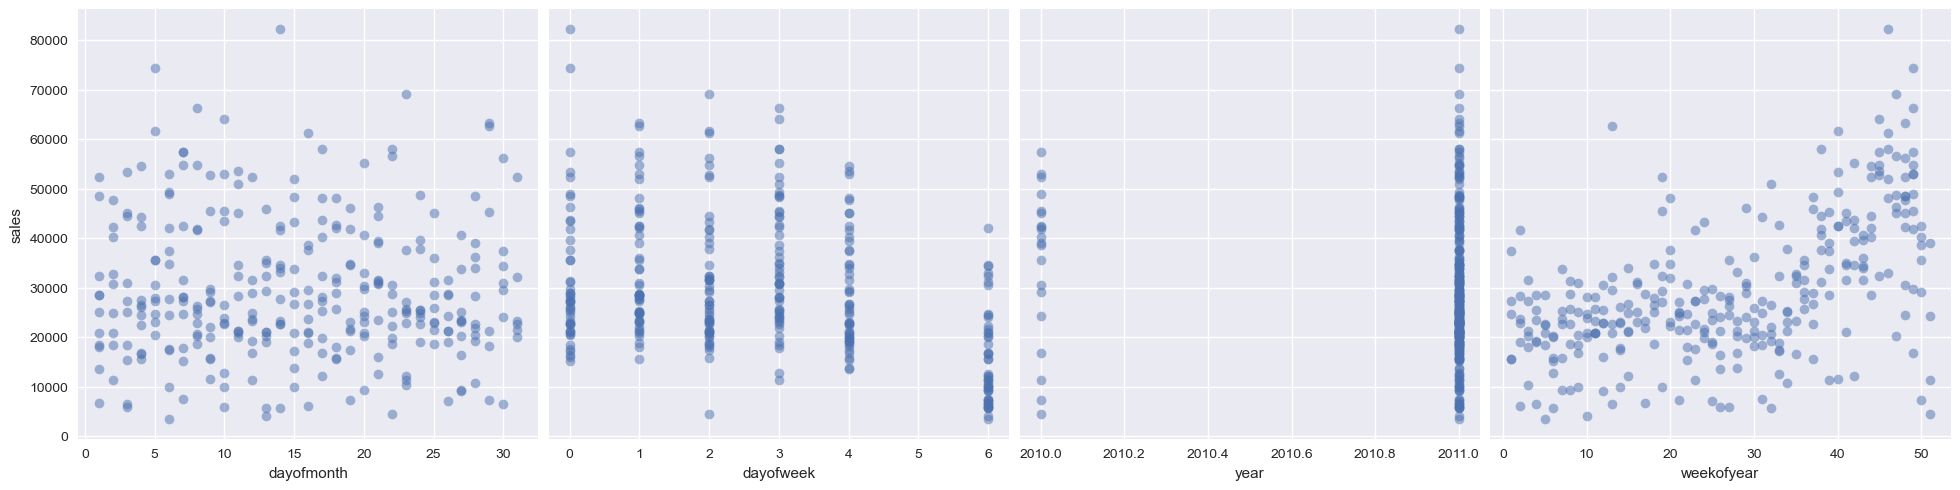

In [359]:
sns.pairplot(df3,
             # hue='hour',
             x_vars=['dayofmonth','dayofweek',
                     'year','weekofyear'],
             y_vars='sales',
             height=5,
             plot_kws={'alpha':0.5, 'linewidth':0}
            )
# plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [381]:
model = Prophet()
model.fit(train.rename(columns={'date':'ds',
                               'sales':'y'}))
# Predict on training set with model
pred = model.predict(df=test.rename(columns={'date':'ds'}))

12:35:39 - cmdstanpy - INFO - Chain [1] start processing
12:35:39 - cmdstanpy - INFO - Chain [1] done processing


In [348]:
pred.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2010-12-01  28959.157089  16931.011145  39884.204921  28959.157089   
1 2010-12-02  28918.408558  21671.421699  44467.947720  28918.408558   
2 2010-12-03  28877.660026  15014.913785  37774.219109  28877.660026   
3 2010-12-05  28796.162963   2912.616371  24497.723528  28796.162963   
4 2010-12-06  28755.414431  17485.622601  39149.170461  28755.414431   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  28959.157089     -803.199872           -803.199872           -803.199872   
1  28918.408558     3765.841990           3765.841990           3765.841990   
2  28877.660026    -2253.262577          -2253.262577          -2253.262577   
3  28796.162963   -14886.173161         -14886.173161         -14886.173161   
4  28755.414431     -334.839693           -334.839693           -334.839693   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -803.199872   -803.199872   -803.199872                   0.0   
1   3765.841990   3765.841990   3765.841990                   0.0   
2  -2253.262577  -2253.262577  -2253.262577                   0.0   
3 -14886.173161 -14886.173161 -14886.173161                   0.0   
4   -334.839693   -334.839693   -334.839693                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  28155.957217  
1                         0.0                         0.0  32684.250548  
2                         0.0                         0.0  26624.397449  
3                         0.0                         0.0  13909.989802  
4                         0.0                         0.0  28420.574738

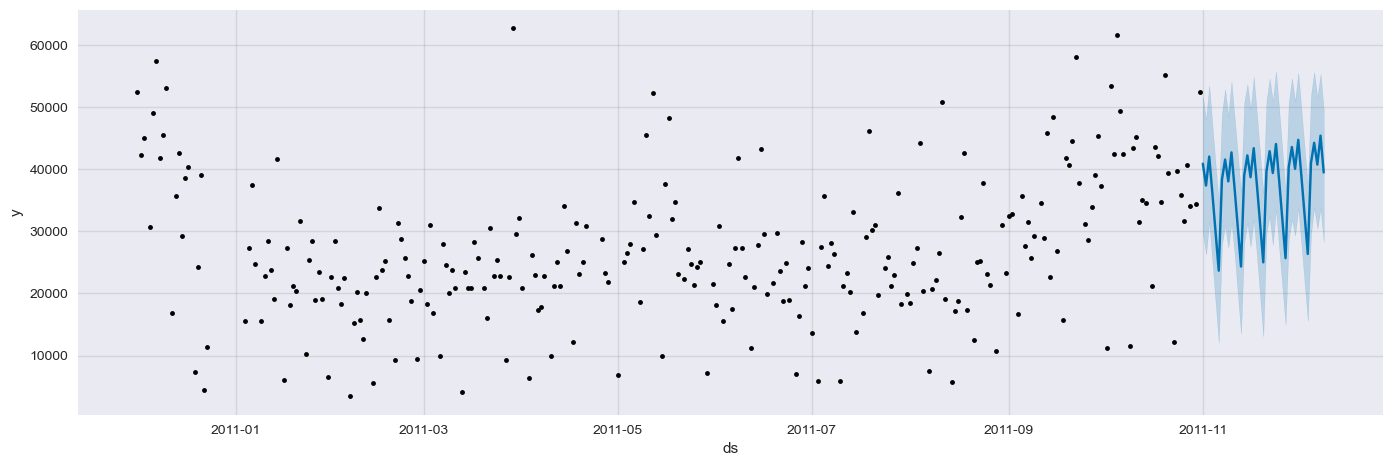

In [382]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pred,
                 ax=ax)
plt.show()

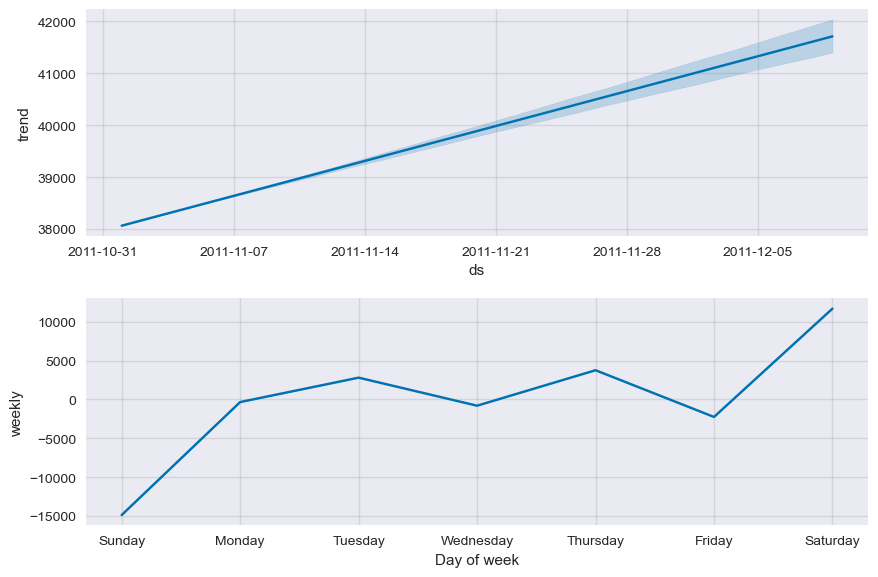

In [383]:
fig = model.plot_components(pred)


In [366]:
test

date  invoice  stockcode  quantity     price  customer id     sales  \
271 2011-11-01       77        886     16090   4964.39           75  28450.86   
272 2011-11-02       79       1232     21502   8389.71           75  40194.97   
273 2011-11-03      101       1203     22675   7176.45           86  44491.89   
274 2011-11-04       91       1255     28687   7497.17           72  54584.37   
275 2011-11-06      101       1312     22673   9228.93           88  41969.99   
276 2011-11-07       92       1045     22054   7063.44           81  57352.90   
277 2011-11-08      108       1476     26146  13536.98           96  54753.05   
278 2011-11-09      117       1244     28942   8002.91          100  52670.78   
279 2011-11-10      128       1303     32668   9643.65          112  63988.84   
280 2011-11-11      105       1532     28388  12406.04           88  53497.22   
281 2011-11-13       87       1258     19957   7764.06           76  32350.82   
282 2011-11-14      106       1413     37191  10903.30           94  82266.42   
283 2011-11-15      106       1454     25585  10968.99           94  51910.86   
284 2011-11-16      129       1514     30624  13515.39          111  61195.21   
285 2011-11-17      137       1437     30159  10693.52          126  58020.20   
286 2011-11-18      106       1238     22130   8613.27           97  48179.05   
287 2011-11-20       99       1283     18530   8925.51           92  33004.62   
288 2011-11-21       99       1258     24383   8365.21           85  46396.35   
289 2011-11-22      132       1502     29165  11837.27          118  56607.25   
290 2011-11-23      129       1405     32821  11792.34          107  69214.20   
291 2011-11-24      113       1509     25042  11811.35           99  48765.76   
292 2011-11-25       83       1377     17732  11086.73           70  45183.63   
293 2011-11-27       57       1123     10942   6231.96           52  20279.37   
294 2011-11-28      113       1441     25816  10462.14           97  48549.71   
295 2011-11-29      133       1556     26731  14741.50          109  63196.99   
296 2011-11-30      108       1377     26240  11941.26           93  56244.27   
297 2011-12-01      120       1249     24547   8817.22          111  48523.71   
298 2011-12-02      116       1310     22146   8935.70           94  47735.29   
299 2011-12-04       66       1038     12296   5461.47           59  24477.47   
300 2011-12-05      125       1764     37437  18335.19          105  74412.22   
301 2011-12-06      115       1418     28320   9102.69          104  53009.97   
302 2011-12-07      102       1109     31839   6599.18           93  54761.17   
303 2011-12-08      118       1664     29303  16933.18          105  66390.57   
304 2011-12-09       43       1079     12713   6341.29           35  29773.24   

     hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear  \
271     0          1        4     11  2011        305           1          44   
272     0          2        4     11  2011        306           2          44   
273     0          3        4     11  2011        307           3          44   
274     0          4        4     11  2011        308           4          44   
275     0          6        4     11  2011        310           6          44   
276     0          0        4     11  2011        311           7          45   
277     0          1        4     11  2011        312           8          45   
278     0          2        4     11  2011        313           9          45   
279     0          3        4     11  2011        314          10          45   
280     0          4        4     11  2011        315          11          45   
281     0          6        4     11  2011        317          13          45   
282     0          0        4     11  2011        318          14          46   
283     0          1        4     11  2011        319          15          46   
284     0          2        4     11  20

In [367]:
pred

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2010-12-01  28959.157089  16931.011145  39884.204921  28959.157089   
1   2010-12-02  28918.408558  21671.421699  44467.947720  28918.408558   
2   2010-12-03  28877.660026  15014.913785  37774.219109  28877.660026   
3   2010-12-05  28796.162963   2912.616371  24497.723528  28796.162963   
4   2010-12-06  28755.414431  17485.622601  39149.170461  28755.414431   
..         ...           ...           ...           ...           ...   
300 2011-12-05  41328.672539  29789.400086  51425.994392  41026.292122   
301 2011-12-06  41424.754213  33536.085765  55419.796054  41111.811245   
302 2011-12-07  41520.835888  29590.115335  51991.764938  41193.668124   
303 2011-12-08  41616.917562  34372.194707  56518.009953  41270.559229   
304 2011-12-09  41712.999236  27867.424931  50410.703318  41345.275722   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    28959.157089     -803.199872           -803.199872           -803.199872   
1    28918.408558     3765.841990           3765.841990           3765.841990   
2    28877.660026    -2253.262577          -2253.262577          -2253.262577   
3    28796.162963   -14886.173161         -14886.173161         -14886.173161   
4    28755.414431     -334.839693           -334.839693           -334.839693   
..            ...             ...                   ...                   ...   
300  41611.778733     -334.839693           -334.839693           -334.839693   
301  41722.573279     2807.537033           2807.537033           2807.537033   
302  41831.466389     -803.199872           -803.199872           -803.199872   
303  41941.918974     3765.841990           3765.841990           3765.841990   
304  42056.859344    -2253.262577          -2253.262577          -2253.262577   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     -803.199872   -803.199872   -803.199872                   0.0   
1     3765.841990   3765.841990   3765.841990                   0.0   
2    -2253.262577  -2253.262577  -2253.262577                   0.0   
3   -14886.173161 -14886.173161 -14886.173161                   0.0   
4     -334.839693   -334.839693   -334.839693                   0.0   
..            ...           ...           ...                   ...   
300   -334.839693   -334.839693   -334.839693                   0.0   
301   2807.537033   2807.537033   2807.537033                   0.0   
302   -803.199872   -803.199872   -803.199872                   0.0   
303   3765.841990   3765.841990   3765.841990                   0.0   
304  -2253.262577  -2253.262577  -2253.262577                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  28155.957217  
1                           0.0                         0.0  32684.250548  
2                           0.0                         0.0  26624.397449  
3                           0.0                         0.0  13909.989802  
4                           0.0                         0.0  28420.574738  
..                          ...                         ...           ...  
300                         0.0                         0.0  40993.832846  
301                         0.0                         0.0  44232.291247  
302                         0.0                         0.0  40717.636016  
303                         0.0                         0.0  45382.759552  
304                         0.0                         0.0  39459.736659  

[305 rows x 16 columns]

In [ ]:
test['pred'] = 

<Axes: xlabel='date', ylabel='sales'>

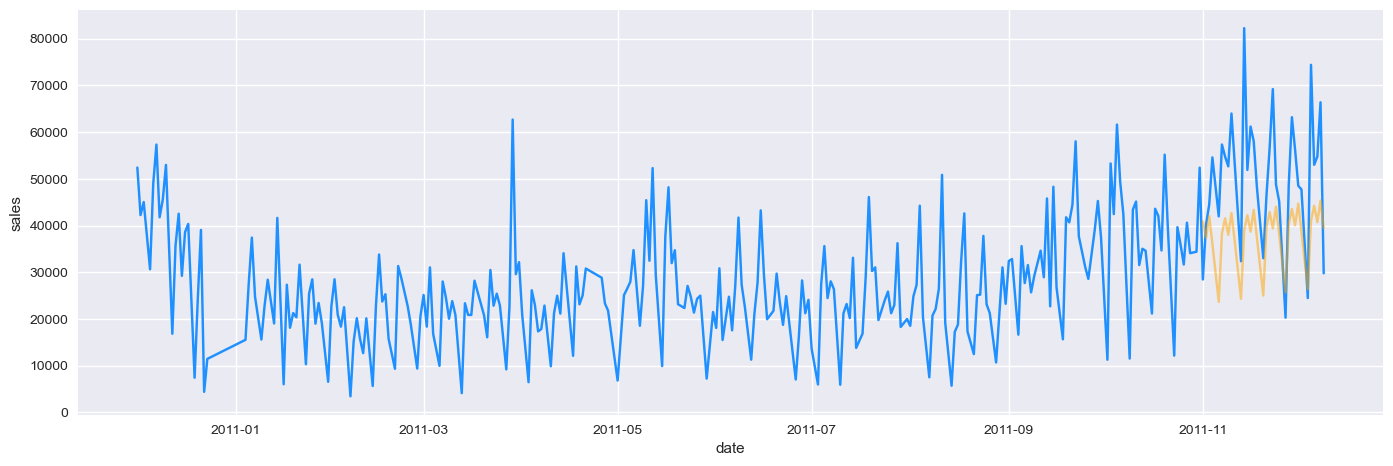

In [384]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
sns.lineplot( x = df3['date'], y = df3['sales'], color='dodgerblue')
sns.lineplot( x =  pred['ds'], y = pred['yhat'], color='orange', alpha=0.5)
# fig = model.plot(pred, ax=ax)

In [385]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=test['sales'],
                   y_pred=pred['yhat'])

26.009208892021064

# Conclusion


XGBoost really nails it comprared to Prophet
It's understandable that Prophet is more suitable with highly seasonal time series while XGBoost is more suitable with large amount of data, and you can touch on each single feature, and finely tune the model yourself